In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # data viz library
import math

In [36]:
data = pd.read_csv('../Dataset/Training/Features_Variant_1.csv')
data  # 54 features, 40948 data instances

634995   0     463  1  0.0   806.0  11.291044776119403    1.0  \
0       634995   0     463  1  0.0   806.0           11.291045    1.0   
1       634995   0     463  1  0.0   806.0           11.291045    1.0   
2       634995   0     463  1  0.0   806.0           11.291045    1.0   
3       634995   0     463  1  0.0   806.0           11.291045    1.0   
4       634995   0     463  1  0.0   806.0           11.291045    1.0   
...        ...  ..     ... ..  ...     ...                 ...    ...   
40943  7170111  70  497000  9  0.0  1881.0          497.200000  269.0   
40944  7170111  70  497000  9  0.0  1881.0          497.200000  269.0   
40945  7170111  70  497000  9  0.0  1881.0          497.200000  269.0   
40946  7170111  70  497000  9  0.0  1881.0          497.200000  269.0   
40947  7170111  70  497000  9  0.0  1881.0          497.200000  269.0   

       70.49513846124168  0.0.1  ...  0.11  0.12  0.13  0.14  0.15  0.16  \
0              70.495138    0.0  ...     0     0     0     0     0     0   
1              70.495138    0.0  ...     1     0     0     0     0     0   
2              70.495138    0.0  ...     1     0     0     1     0     0   
3              70.495138    0.0  ...     0     0     0     0     0     1   
4              70.495138    0.0  ...     0     0     0     0     0     0   
...                  ...    ...  ...   ...   ...   ...   ...   ...   ...   
40943         502.318385    0.0  ...     0     0     0     0     0     0   
40944         502.318385    0.0  ...     0     0     0     0     0     0   
40945         502.318385    0.0  ...     0     0     0     0     0     0   
40946         502.318385    0.0  ...     0     0     0     0     0     0   
40947         502.318385    0.0  ...     0     0     0     0     0     0   

       0.17  0.18  1.2  0.19  
0         0     1    0     0  
1         0     0    1     0  
2         0     0    0     0  
3         0     0    0     0  
4         0     1    0     0  
...     ...   ...  ...   ...  
40943     0     1    0     1  
40944     0     1    0     2  
40945     1     0    0    72  
40946     0     1    0    28  
40947     0     1    0    11  

[40948 rows x 54 columns]

In [37]:
# a) review feature names
data.columns  # we need to assign these columns to their descriptions provided in the paper

Index(['634995', '0', '463', '1', '0.0', '806.0', '11.291044776119403', '1.0',
       '70.49513846124168', '0.0.1', '806.0.1', '7.574626865671642', '0.0.2',
       '69.435826365571', '0.0.3', '76.0', '2.6044776119402986', '0.0.4',
       '8.50550186882253', '0.0.5', '806.0.2', '10.649253731343284', '1.0.1',
       '70.25478763764251', '-69.0', '806.0.3', '4.970149253731344', '0.0.6',
       '69.85058043098057', '0.1', '0.2', '0.3', '0.4', '0.5', '65', '166',
       '2', '0.6', '24', '0.7', '0.8', '0.9', '1.1', '0.10', '0.11', '0.12',
       '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '1.2', '0.19'],
      dtype='object')

## Understanding the columns
Breakdown of each Column
# Facebook Comment Volume Prediction Features

## Page Features
| Feature | Description |
|---------|-------------|
| Page likes | Measures user support for a page, indicating popularity and potential reach. |
| Page category | Type of page (local business, brand, company, artist, entertainment, etc.) affecting engagement patterns. |
| Page checkins | Number of users who marked their presence at the location (for place-type pages only). |
| Page talking about | Count of users actively engaged with the page (commenting, liking, sharing). |

## Essential Features (C1-C5)
| Feature | Description |
|---------|-------------|
| C1: Total comment count | Total comments received before the selected base date/time. |
| C2: Recent comment count | Comments received in the last 24 hours relative to base date/time. |
| C3: Previous period comment count | Comments received in the period from 48 to 24 hours before base date/time. |
| C4: First-day comment count | Comments received in first 24 hours after post publication. |
| C5: Rate of change | Difference between recent (C2) and previous period (C3) comment counts. |

## Derived Essential Features (25 features)
| Feature | Description |
|---------|-------------|
| Min, Max, Average, Median, StdDev of C1 | Statistical aggregations of C1 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C2 | Statistical aggregations of C2 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C3 | Statistical aggregations of C3 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C4 | Statistical aggregations of C4 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C5 | Statistical aggregations of C5 across all posts from the same source. |

## Weekday Features (14 features)
| Feature | Description |
|---------|-------------|
| Day of week post published (7 binary indicators) | Binary flags (0/1) indicating which day of the week the post was published. |
| Day of week at base date/time (7 binary indicators) | Binary flags (0/1) indicating which day of the week the base date/time falls on. |

## Other Basic Features
| Feature | Description |
|---------|-------------|
| Document length | Size/length of the post content. |
| Time gap | Time elapsed between post publication and selected base date/time (0-71 hours). |
| Document promotion status | Binary indicator (0/1) of whether the post was promoted. |
| Post share count | Number of times the post was shared by users. |
| Additional feature (non-talked) | Feature mentioned in notes but not clearly defined in the paper. |

In [38]:
# references:
# https://archive.ics.uci.edu/dataset/363/facebook+comment+volume+dataset
# https://uksim.info/uksim2015/data/8713a015.pdf
columns = [
    "Page_Popularity_Likes", "Page_Checkins", "Page_Talking_About", "Page_Category",
    "Derived_1", "Derived_2", "Derived_3", "Derived_4", "Derived_5",
    "Derived_6", "Derived_7", "Derived_8", "Derived_9", "Derived_10",
    "Derived_11", "Derived_12", "Derived_13", "Derived_14", "Derived_15",
    "Derived_16", "Derived_17", "Derived_18", "Derived_19", "Derived_20",
    "Derived_21", "Derived_22", "Derived_23", "Derived_24", "Derived_25",
    "CC1_Total_Comments", "CC2_Comments_Last_24h", "CC3_Comments_48_to_24h",
    "CC4_Comments_First_24h", "CC5_CC2_CC3_Difference", "Base_Time",
    "Post_Length", "Post_Share_Count", "Post_Promotion_Status", "H_Local",
    "Published_Sunday", "Published_Monday", "Published_Tuesday",
    "Published_Wednesday", "Published_Thursday", "Published_Friday",
    "Published_Saturday", "BaseDate_Sunday", "BaseDate_Monday",
    "BaseDate_Tuesday", "BaseDate_Wednesday", "BaseDate_Thursday",
    "BaseDate_Friday", "BaseDate_Saturday", "Target_Comment_Volume"
]
data.columns = columns
data.columns

Index(['Page_Popularity_Likes', 'Page_Checkins', 'Page_Talking_About',
       'Page_Category', 'Derived_1', 'Derived_2', 'Derived_3', 'Derived_4',
       'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9',
       'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14',
       'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18', 'Derived_19',
       'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23', 'Derived_24',
       'Derived_25', 'CC1_Total_Comments', 'CC2_Comments_Last_24h',
       'CC3_Comments_48_to_24h', 'CC4_Comments_First_24h',
       'CC5_CC2_CC3_Difference', 'Base_Time', 'Post_Length',
       'Post_Share_Count', 'Post_Promotion_Status', 'H_Local',
       'Published_Sunday', 'Published_Monday', 'Published_Tuesday',
       'Published_Wednesday', 'Published_Thursday', 'Published_Friday',
       'Published_Saturday', 'BaseDate_Sunday', 'BaseDate_Monday',
       'BaseDate_Tuesday', 'BaseDate_Wednesday', 'BaseDate_Thursday',
       'BaseDate_Frida

In [39]:
# b) summary statistics
display(data.describe())

Page_Popularity_Likes  Page_Checkins  Page_Talking_About  \
count           4.094800e+04   40948.000000        4.094800e+04   
mean            1.313830e+06    4676.247949        4.480133e+04   
std             6.785834e+06   20593.423357        1.109349e+05   
min             3.600000e+01       0.000000        0.000000e+00   
25%             3.673400e+04       0.000000        6.980000e+02   
50%             2.929110e+05       0.000000        7.141000e+03   
75%             1.204214e+06      99.000000        5.026400e+04   
max             4.869723e+08  186370.000000        6.089942e+06   

       Page_Category     Derived_1     Derived_2     Derived_3     Derived_4  \
count   40948.000000  40948.000000  40948.000000  40948.000000  40948.000000   
mean       24.255348      1.586280    443.324998     55.721469     35.646381   
std        19.950496     20.753426    496.698029     86.934332     69.960877   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%         9.000000      0.000000     45.000000      5.527273      2.000000   
50%        18.000000      0.000000    241.000000     23.374101     12.000000   
75%        32.000000      0.000000    717.000000     71.828829     42.000000   
max       106.000000   2341.000000   2341.000000   2341.000000   2341.000000   

          Derived_5     Derived_6  ...  Published_Friday  Published_Saturday  \
count  40948.000000  40948.000000  ...      40948.000000        40948.000000   
mean      67.464077      0.219473  ...          0.146161            0.136930   
std       81.569243     10.055268  ...          0.353272            0.343777   
min        0.000000      0.000000  ...          0.000000            0.000000   
25%        8.278756      0.000000  ...          0.000000            0.000000   
50%       35.069140      0.000000  ...          0.000000            0.000000   
75%      102.554954      0.000000  ...          0.000000            0.000000   
max      731.394558   1923.000000  ...          1.000000            1.000000   

       BaseDate_Sunday  BaseDate_Monday  BaseDate_Tuesday  BaseDate_Wednesday  \
count     40948.000000     40948.000000      40948.000000        40948.000000   
mean          0.141643         0.132510          0.137638            0.148603   
std           0.348688         0.339048          0.344524            0.355701   
min           0.000000         0.000000          0.000000            0.000000   
25%           0.000000         0.000000          0.000000            0.000000   
50%           0.000000         0.000000          0.000000            0.000000   
75%           0.000000         0.000000          0.000000            0.000000   
max           1.000000         1.000000          1.000000            1.000000   

       BaseDate_Thursday  BaseDate_Friday  BaseDate_Saturday  \
count       40948.000000     40948.000000       40948.000000   
mean            0.150850         0.143890           0.144867   
std             0.357907         0.350982           0.351971   
min             0.000000         0.000000           0.000000   
25%             0.000000         0.000000           0.000000   
50%             0.000000         0.000000           0.000000   
75%             0.000000         0.000000           0.000000   
max             1.000000         1.000000           1.000000   

       Target_Comment_Volume  
count           40948.000000  
mean                7.323068  
std                35.494965  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 3.000000  
max              1305.000000  

[8 rows x 54 columns]

In [40]:
# c) review data types
data.info()  # all numeric/binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Page_Popularity_Likes   40948 non-null  int64  
 1   Page_Checkins           40948 non-null  int64  
 2   Page_Talking_About      40948 non-null  int64  
 3   Page_Category           40948 non-null  int64  
 4   Derived_1               40948 non-null  float64
 5   Derived_2               40948 non-null  float64
 6   Derived_3               40948 non-null  float64
 7   Derived_4               40948 non-null  float64
 8   Derived_5               40948 non-null  float64
 9   Derived_6               40948 non-null  float64
 10  Derived_7               40948 non-null  float64
 11  Derived_8               40948 non-null  float64
 12  Derived_9               40948 non-null  float64
 13  Derived_10              40948 non-null  float64
 14  Derived_11              40948 non-null

In [41]:
# d) identify anomalies/null values/outliers
print("NULL VALUES CHECK:")
display(data.isnull().sum()) # no explicit null values

NULL VALUES CHECK:


Page_Popularity_Likes     0
Page_Checkins             0
Page_Talking_About        0
Page_Category             0
Derived_1                 0
Derived_2                 0
Derived_3                 0
Derived_4                 0
Derived_5                 0
Derived_6                 0
Derived_7                 0
Derived_8                 0
Derived_9                 0
Derived_10                0
Derived_11                0
Derived_12                0
Derived_13                0
Derived_14                0
Derived_15                0
Derived_16                0
Derived_17                0
Derived_18                0
Derived_19                0
Derived_20                0
Derived_21                0
Derived_22                0
Derived_23                0
Derived_24                0
Derived_25                0
CC1_Total_Comments        0
CC2_Comments_Last_24h     0
CC3_Comments_48_to_24h    0
CC4_Comments_First_24h    0
CC5_CC2_CC3_Difference    0
Base_Time                 0
Post_Length         

In [42]:
# The first occurrence of each duplicate is not marked as True by duplicated() so only subsequent occurrences are considered duplicates
print("DUPLICATES CHECK")
display(data[data.duplicated()])

DUPLICATES CHECK


Page_Popularity_Likes  Page_Checkins  Page_Talking_About  \
3081                 5970921          53096              234501   
4893                 4290409             11              131422   
4935                 4290409             11              131422   
14009                  25599           2023                1835   
15807                   1670              0                   8   
22030                   4685          11267                 391   
26080                   2736            491                 277   
36303                    296            165                   1   

       Page_Category  Derived_1  Derived_2   Derived_3  Derived_4   Derived_5  \
3081               9        4.0     1311.0  141.198830       50.0  239.394133   
4893               9        0.0     1184.0  140.889952       65.0  203.263664   
4935               9        0.0     1184.0  140.889952       65.0  203.263664   
14009             32        0.0      183.0   12.200000        0.0   36.062882   
15807             13        0.0        5.0    0.277778        0.0    0.803157   
22030             32        0.0        5.0    0.538462        0.0    1.194993   
26080             54        0.0       18.0    1.757143        0.5    3.044600   
36303             56        0.0        1.0    0.200000        0.0    0.400000   

       Derived_6  ...  Published_Friday  Published_Saturday  BaseDate_Sunday  \
3081         0.0  ...                 0                   0                0   
4893         0.0  ...                 0                   0                1   
4935         0.0  ...                 0                   0                0   
14009        0.0  ...                 0                   0                0   
15807        0.0  ...                 1                   0                1   
22030        0.0  ...                 1                   0                0   
26080        0.0  ...                 0                   0                0   
36303        0.0  ...                 0                   0                0   

       BaseDate_Monday  BaseDate_Tuesday  BaseDate_Wednesday  \
3081                 1                 0                   0   
4893                 0                 0                   0   
4935                 0                 1                   0   
14009                0                 0                   0   
15807                0                 0                   0   
22030                0                 0                   0   
26080                0                 0                   0   
36303                0                 0                   0   

       BaseDate_Thursday  BaseDate_Friday  BaseDate_Saturday  \
3081                   0                0                  0   
4893                   0                0                  0   
4935                   0                0                  0   
14009                  1                0                  0   
15807                  0                0                  0   
22030                  0                1                  0   
26080                  0                1                  0   
36303                  0                1                  0   

       Target_Comment_Volume  
3081                      12  
4893                       1  
4935                       0  
14009                      0  
15807                      0  
22030                      0  
26080                      0  
36303                      0  

[8 rows x 54 columns]

In [43]:
print("UNIQUE VALS CHECK")
display(data.nunique())  # Post Promotion Status only has 1 unique val

UNIQUE VALS CHECK


Page_Popularity_Likes      639
Page_Checkins              173
Page_Talking_About         507
Page_Category               81
Derived_1                   65
Derived_2                  363
Derived_3                  577
Derived_4                  215
Derived_5                  594
Derived_6                   35
Derived_7                  302
Derived_8                  551
Derived_9                  115
Derived_10                 566
Derived_11                  12
Derived_12                 307
Derived_13                 541
Derived_14                  93
Derived_15                 560
Derived_16                  63
Derived_17                 363
Derived_18                 572
Derived_19                 206
Derived_20                 591
Derived_21                 282
Derived_22                 301
Derived_23                 544
Derived_24                 102
Derived_25                 585
CC1_Total_Comments         970
CC2_Comments_Last_24h      628
CC3_Comments_48_to_24h     602
CC4_Comm

In [44]:
# e) visualizations
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Page_Popularity_Likes', 'Page_Checkins', 'Page_Talking_About', 'Page_Category', 'Derived_1', 'Derived_2', 'Derived_3', 'Derived_4', 'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14', 'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23', 'Derived_24', 'Derived_25', 'CC1_Total_Comments', 'CC2_Comments_Last_24h', 'CC3_Comments_48_to_24h', 'CC4_Comments_First_24h', 'CC5_CC2_CC3_Difference', 'Base_Time', 'Post_Length', 'Post_Share_Count', 'Post_Promotion_Status', 'H_Local', 'Published_Sunday', 'Published_Monday', 'Published_Tuesday', 'Published_Wednesday', 'Published_Thursday', 'Published_Friday', 'Published_Saturday', 'BaseDate_Sunday', 'BaseDate_Monday', 'BaseDate_Tuesday', 'BaseDate_Wednesday', 'BaseDate_Thursday', 'BaseDate_Friday', 'BaseDate_Saturday', 'Target_C

Page_Popularity_Likes
Skew : 56.09


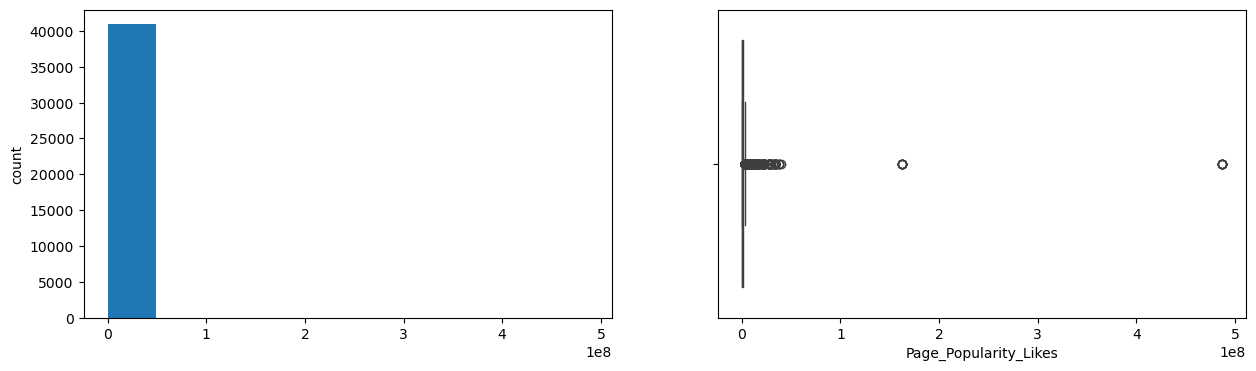

Page_Checkins
Skew : 6.21


Page_Talking_About
Skew : 14.24


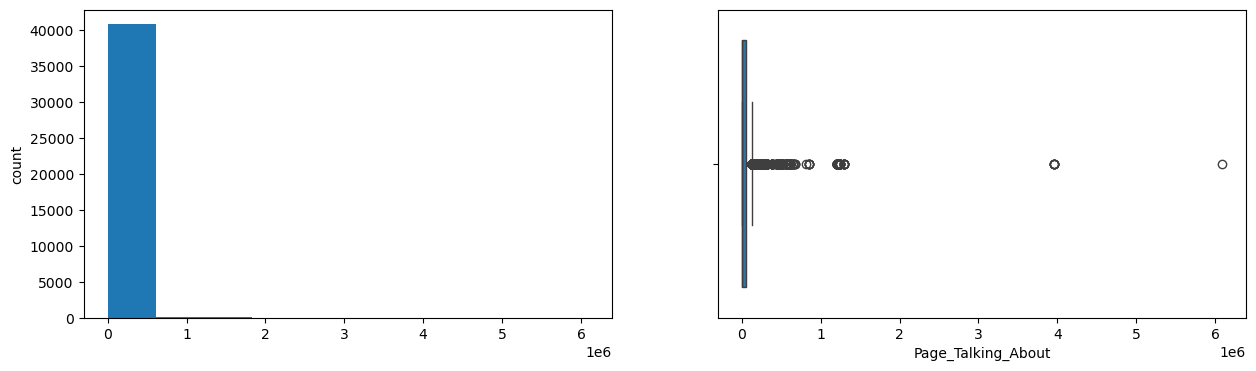

Page_Category
Skew : 1.74


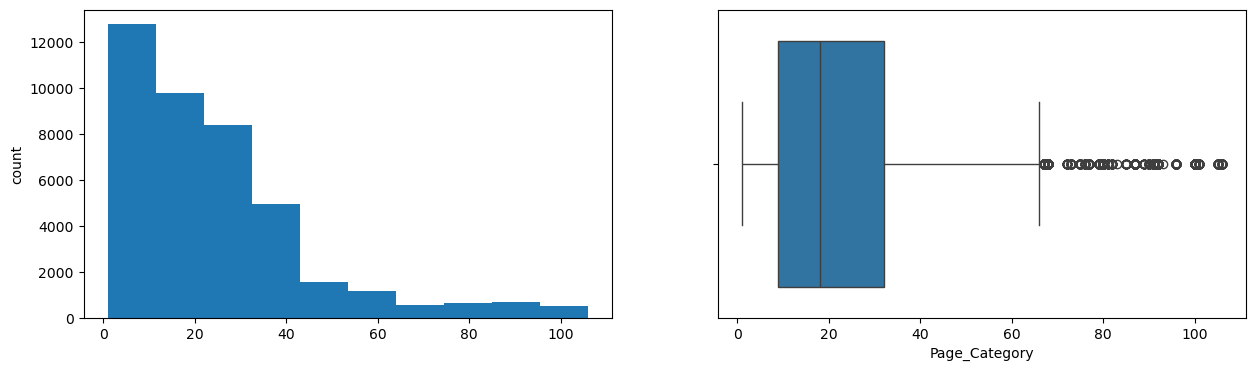

Derived_1
Skew : 63.06


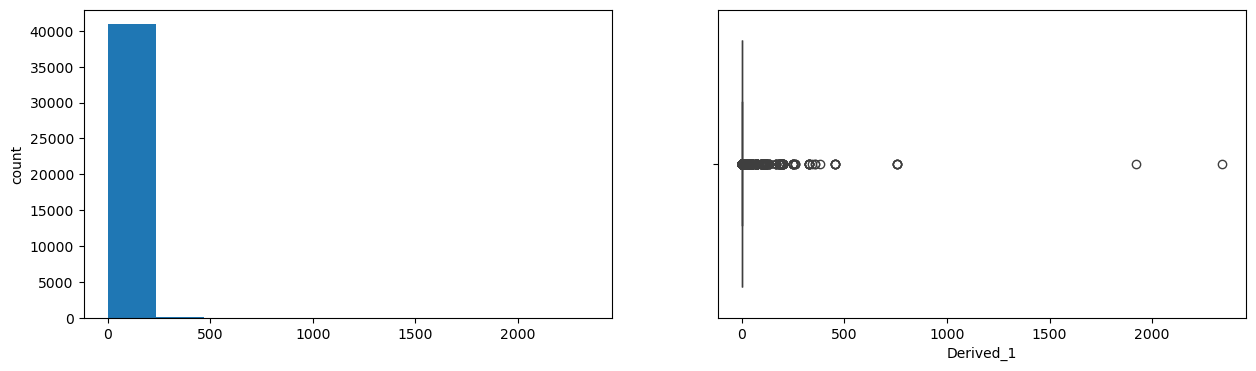

Derived_2
Skew : 1.36


Derived_3
Skew : 4.73


Derived_4
Skew : 7.51


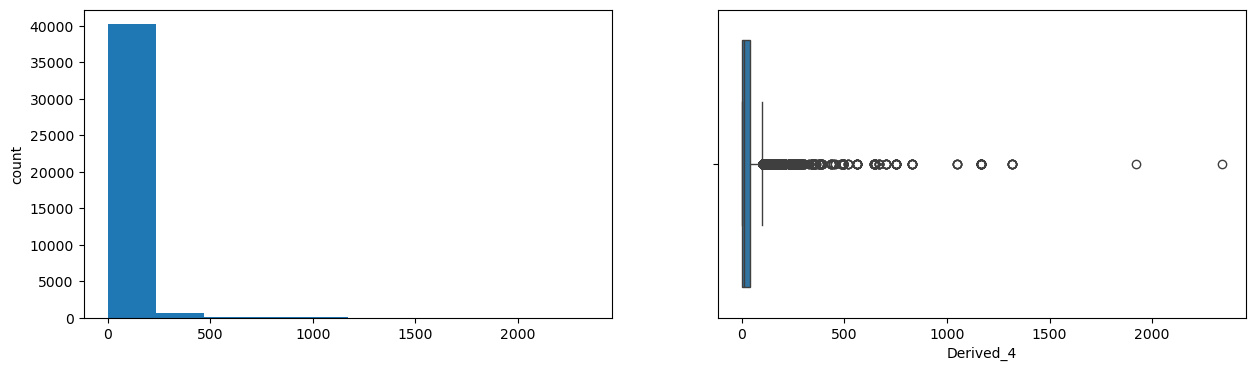

Derived_5
Skew : 2.01


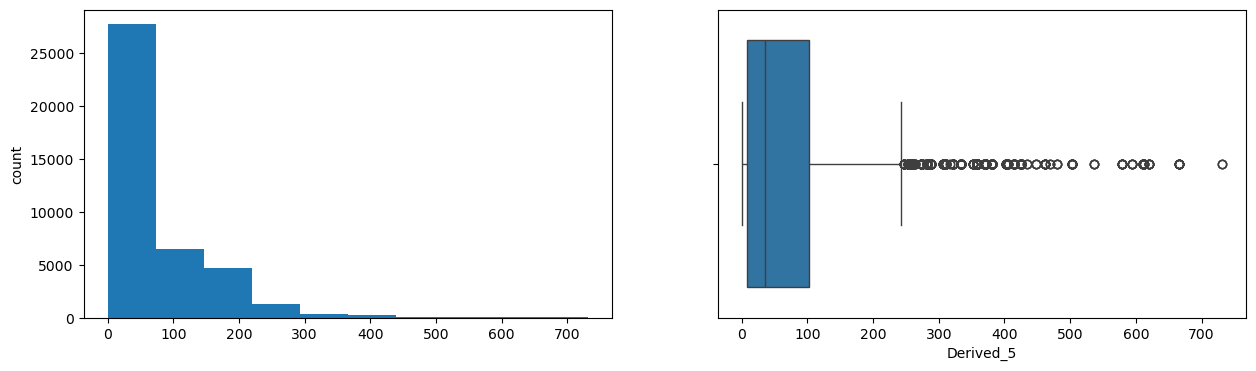

Derived_6
Skew : 172.61


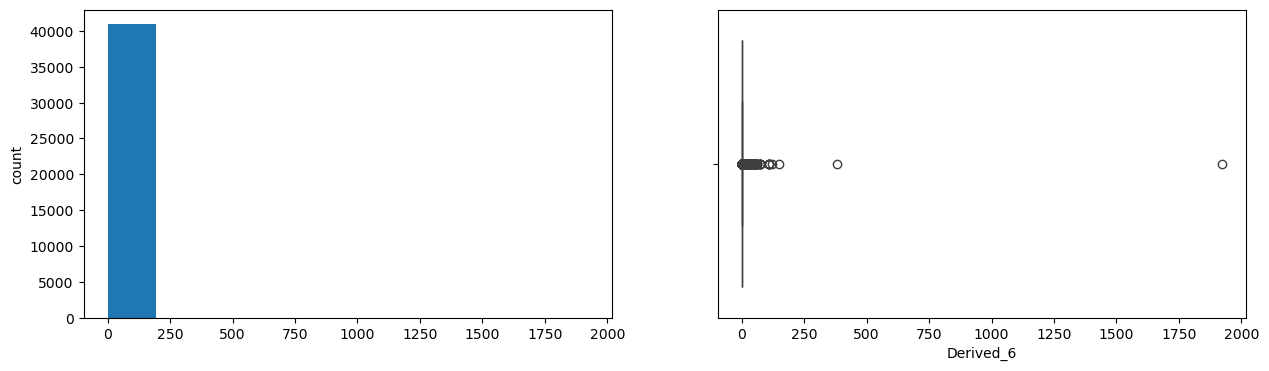

Derived_7
Skew : 1.95


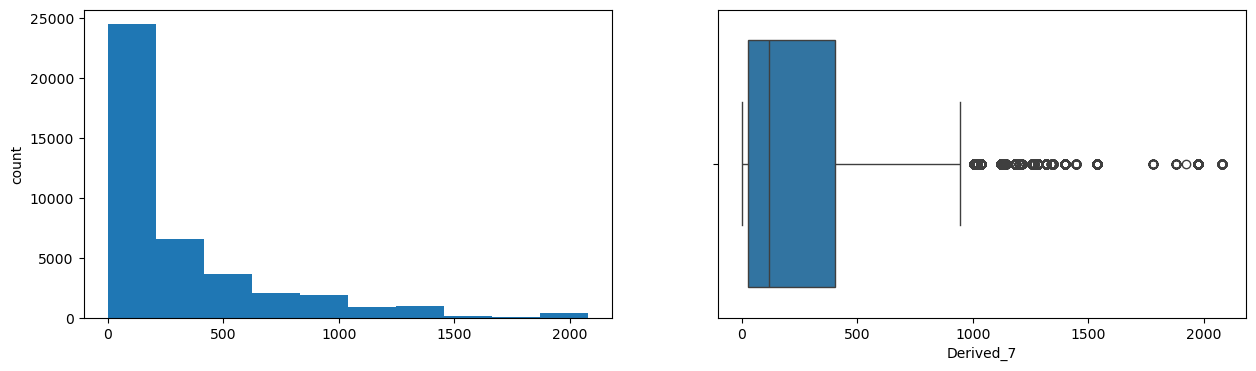

Derived_8
Skew : 7.33


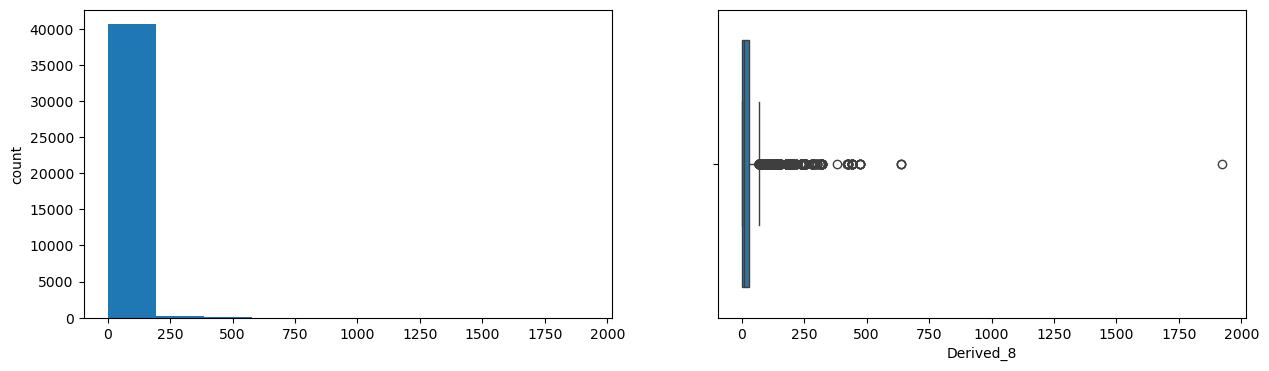

Derived_9
Skew : 25.18


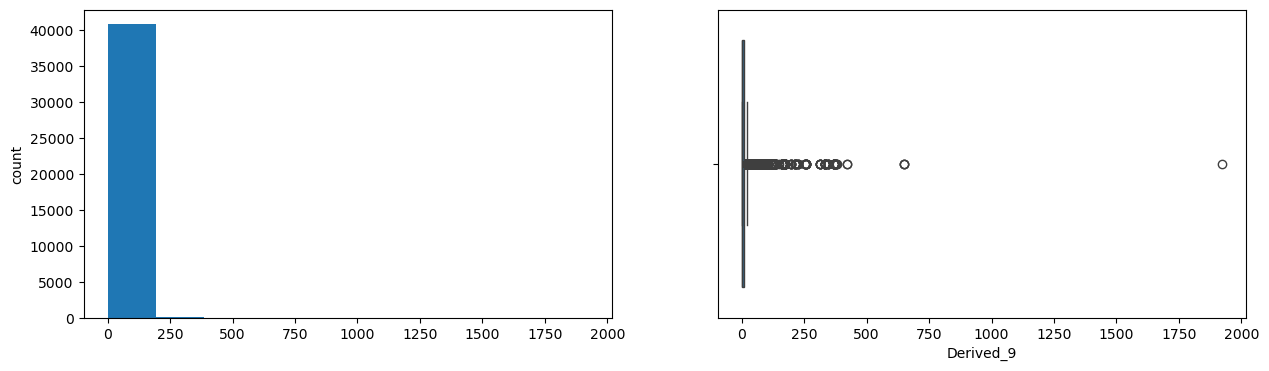

Derived_10
Skew : 2.46


Derived_11
Skew : 131.45


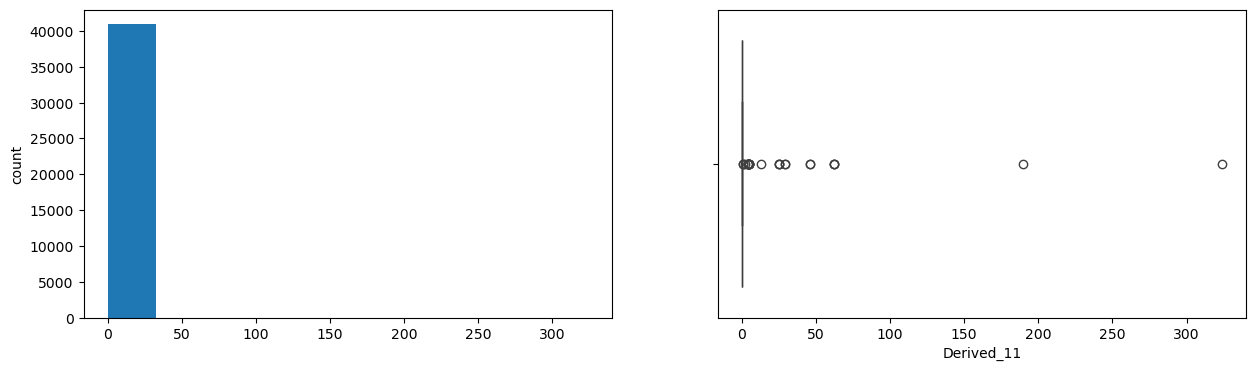

Derived_12
Skew : 1.57


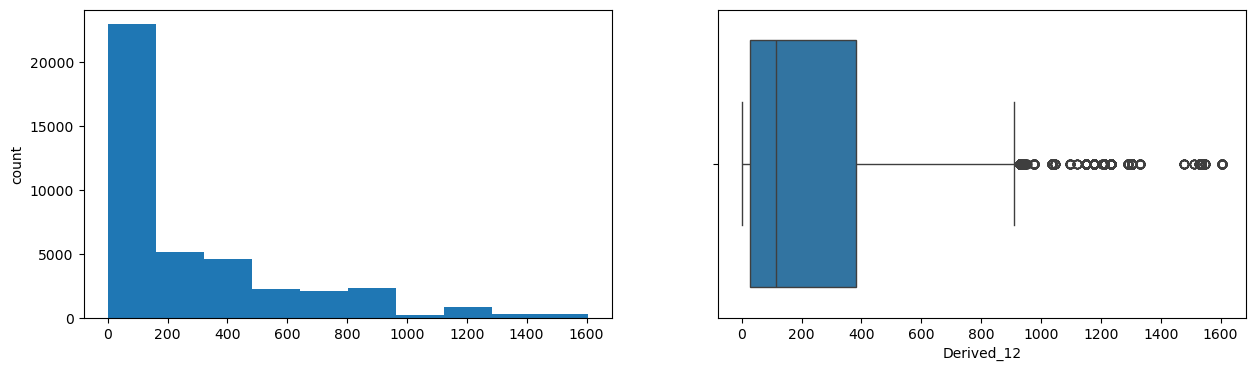

Derived_13
Skew : 4.62


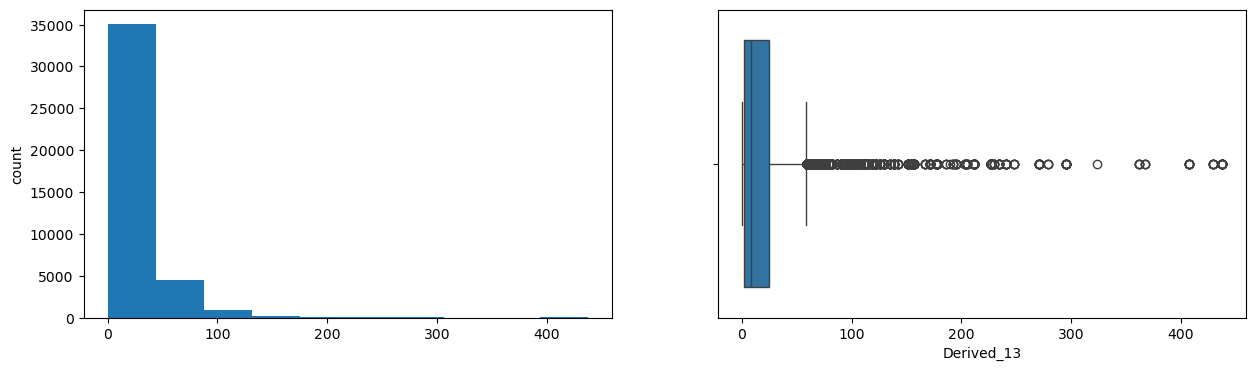

Derived_14
Skew : 13.45


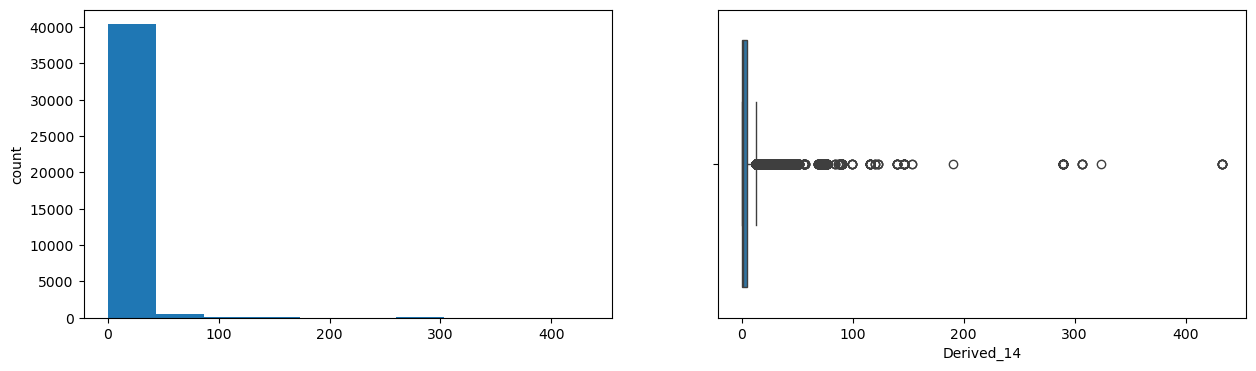

Derived_15
Skew : 2.69


Derived_16
Skew : 59.83


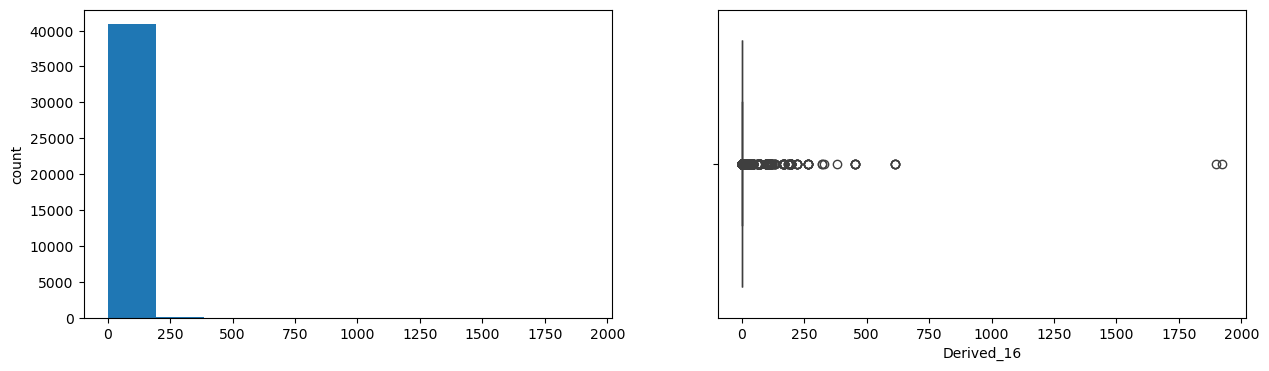

Derived_17
Skew : 1.41


Derived_18
Skew : 4.42


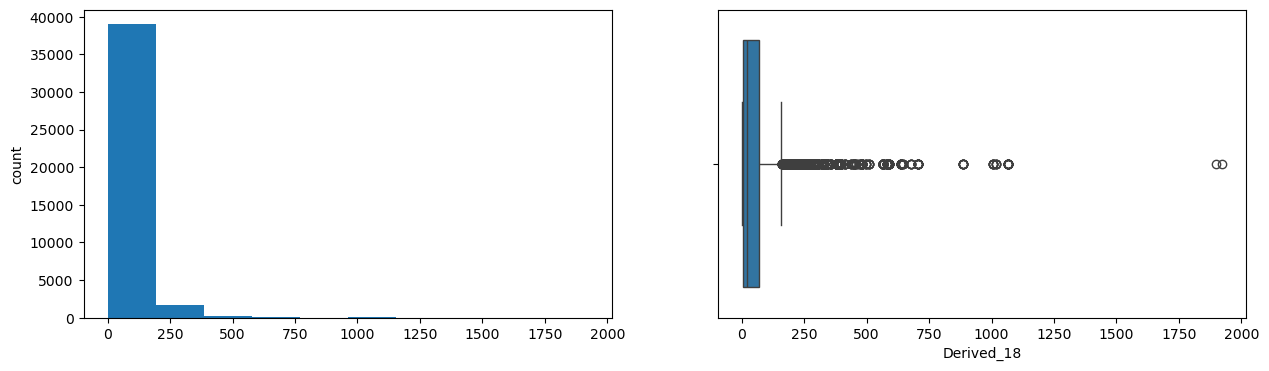

Derived_19
Skew : 7.03


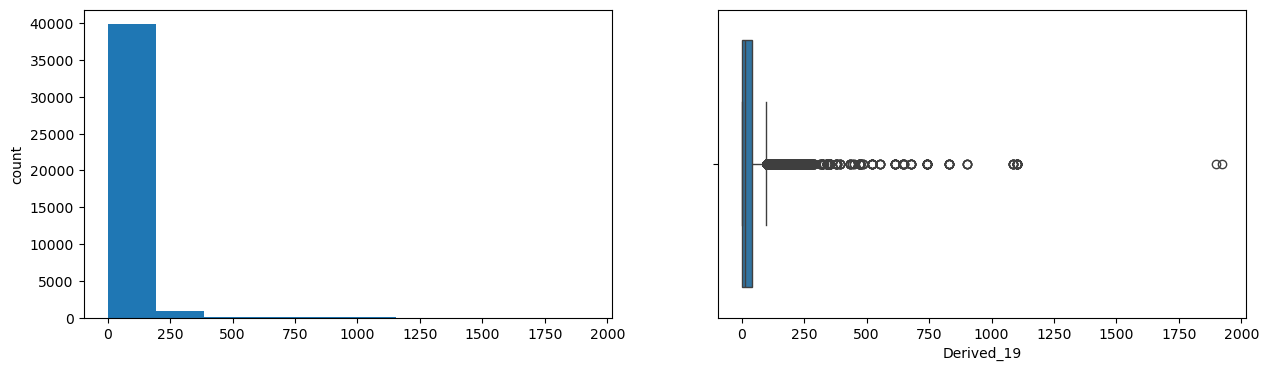

Derived_20
Skew : 1.91


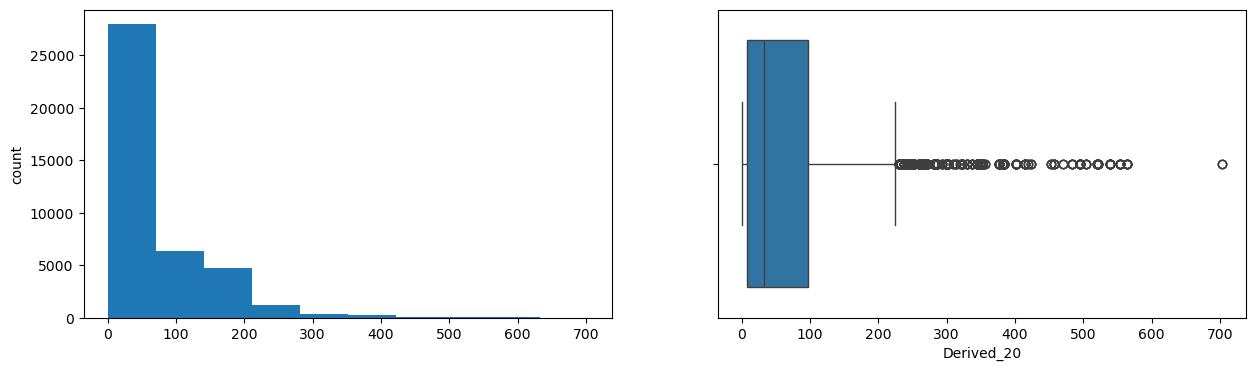

Derived_21
Skew : -1.71


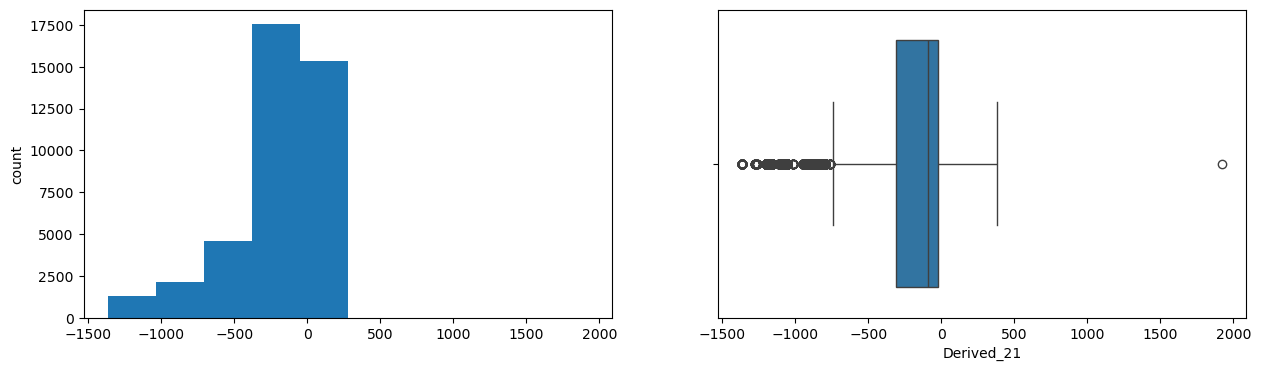

Derived_22
Skew : 2.02


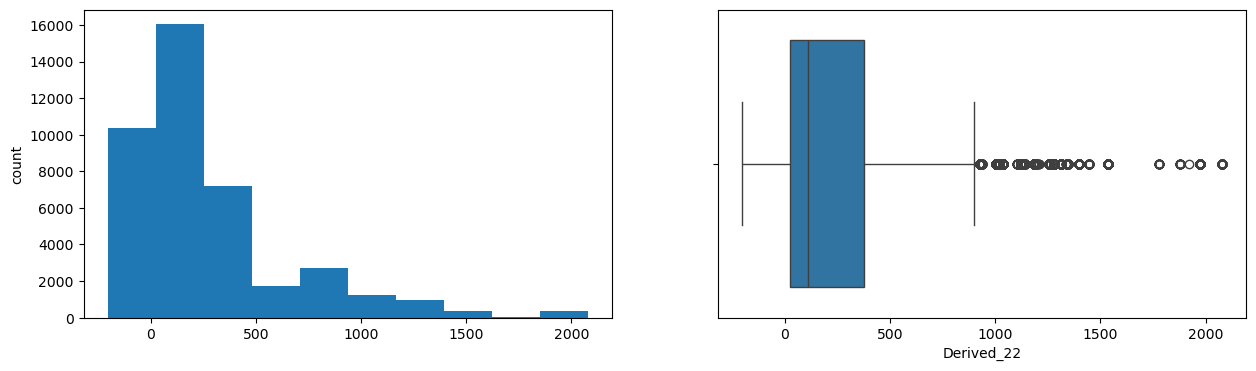

Derived_23
Skew : 37.4


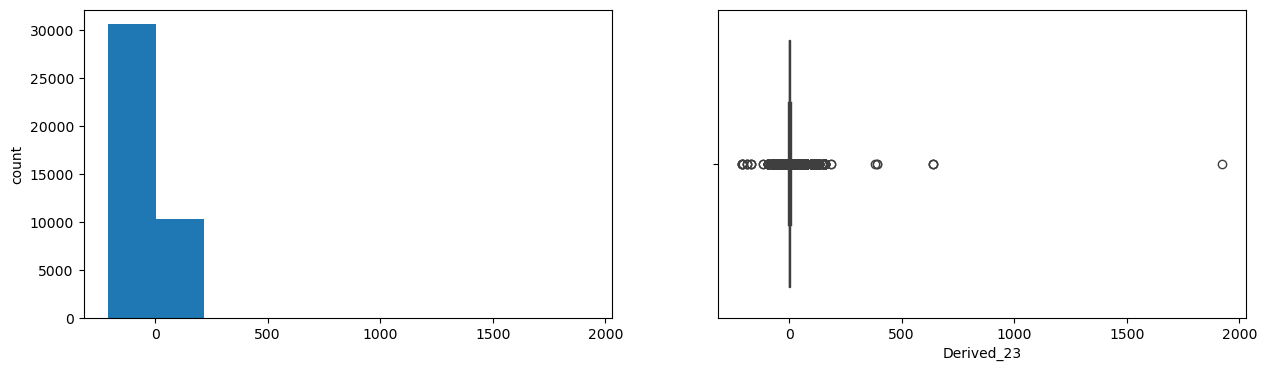

Derived_24
Skew : 61.93


Derived_25
Skew : 2.52


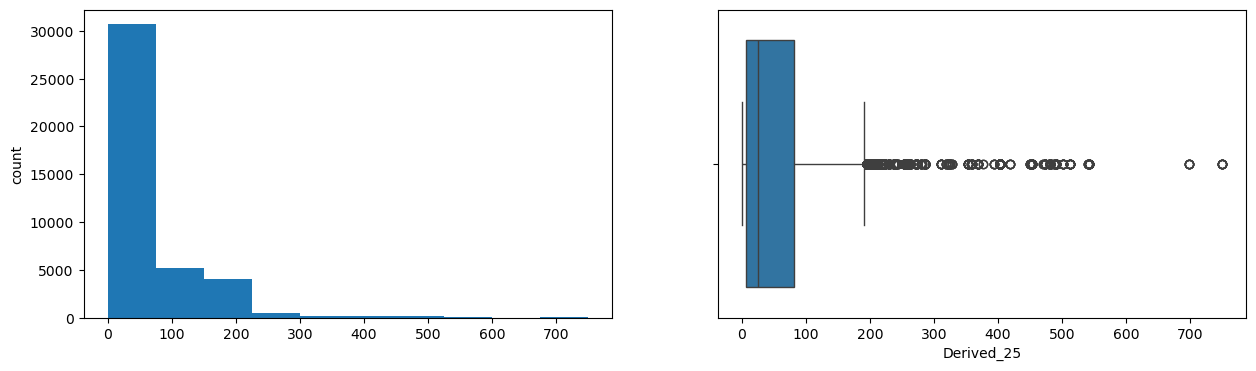

CC1_Total_Comments
Skew : 6.08


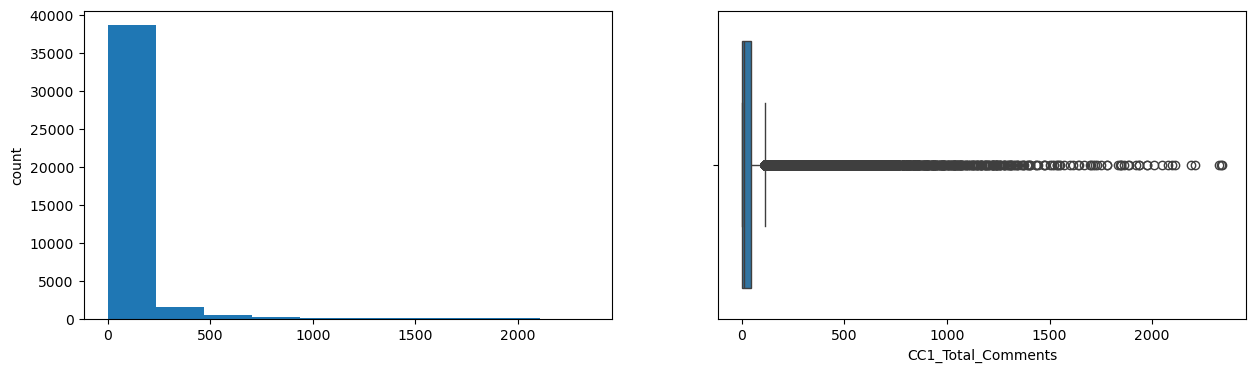

CC2_Comments_Last_24h
Skew : 9.23


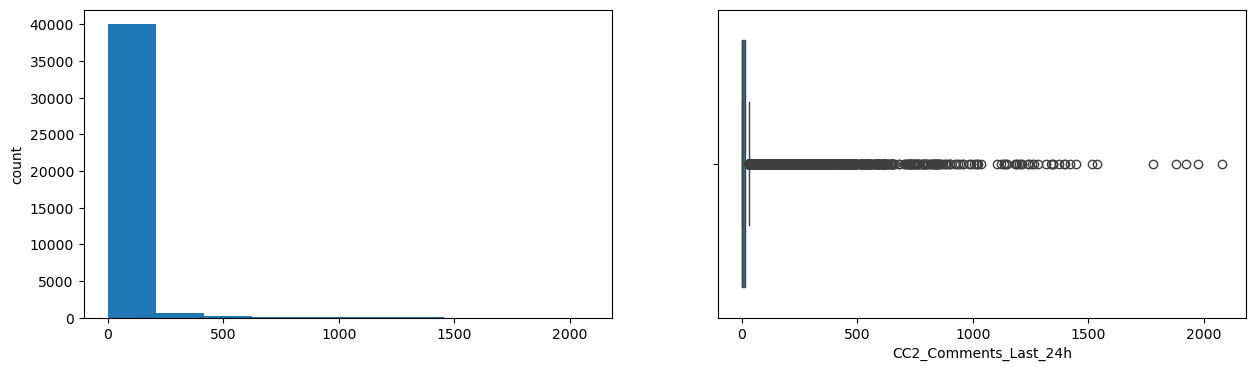

CC3_Comments_48_to_24h
Skew : 8.82


CC4_Comments_First_24h
Skew : 5.94


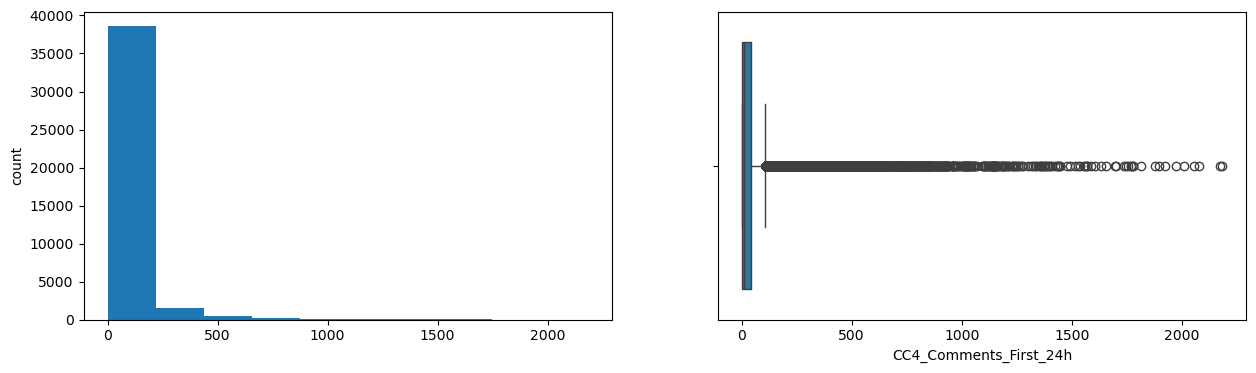

CC5_CC2_CC3_Difference
Skew : 2.86


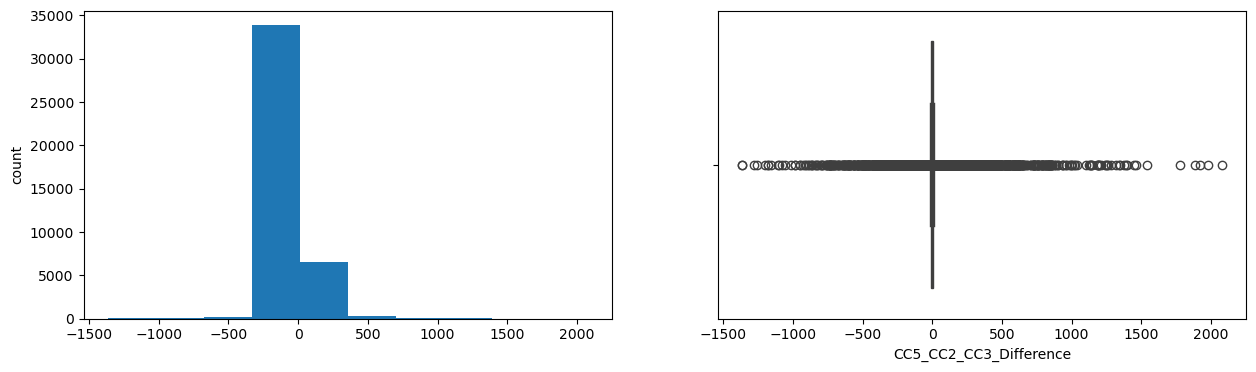

Base_Time
Skew : 0.04


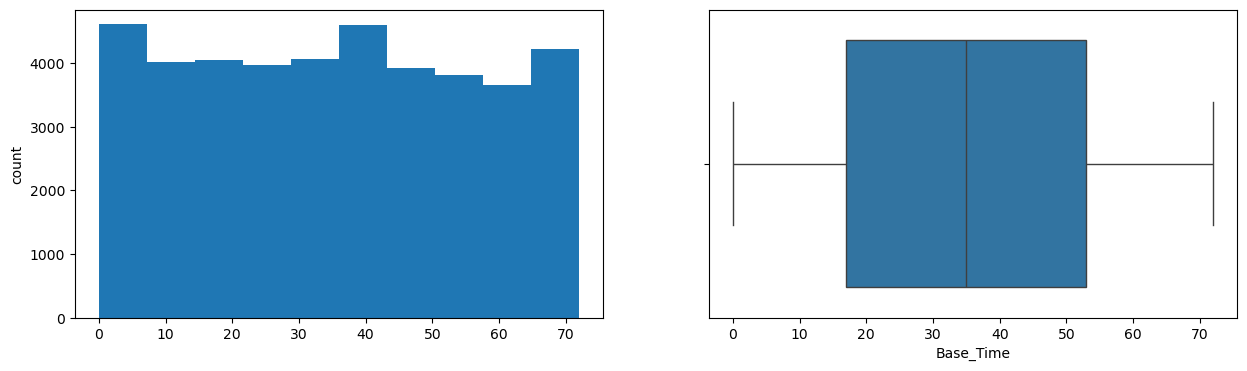

Post_Length
Skew : 19.59


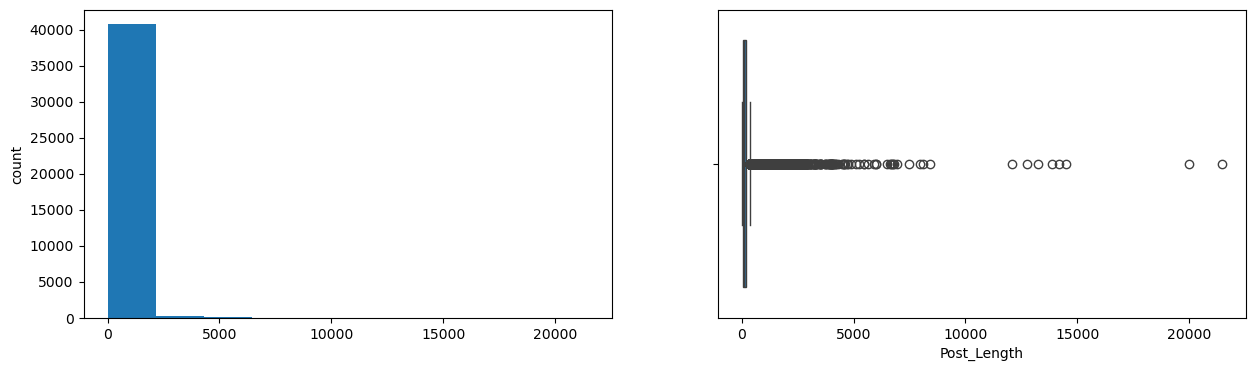

Post_Share_Count
Skew : 103.63


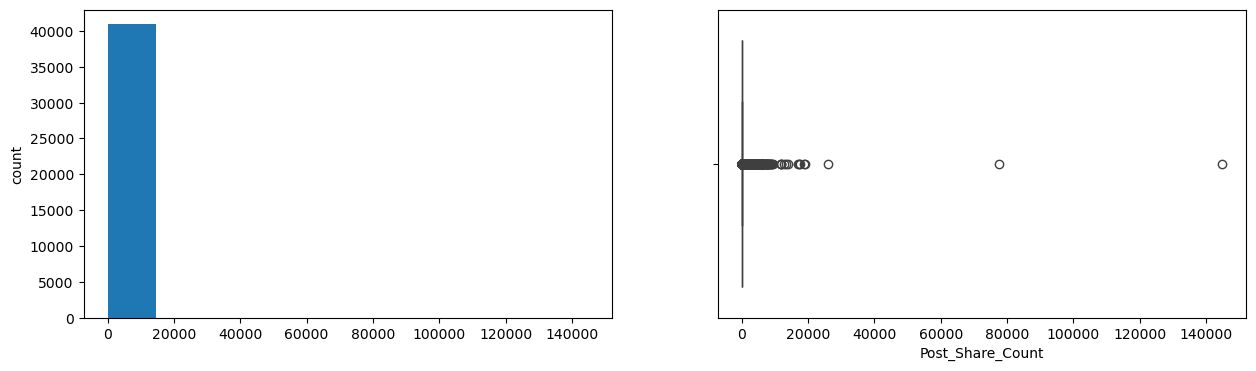

Post_Promotion_Status
Skew : 0.0


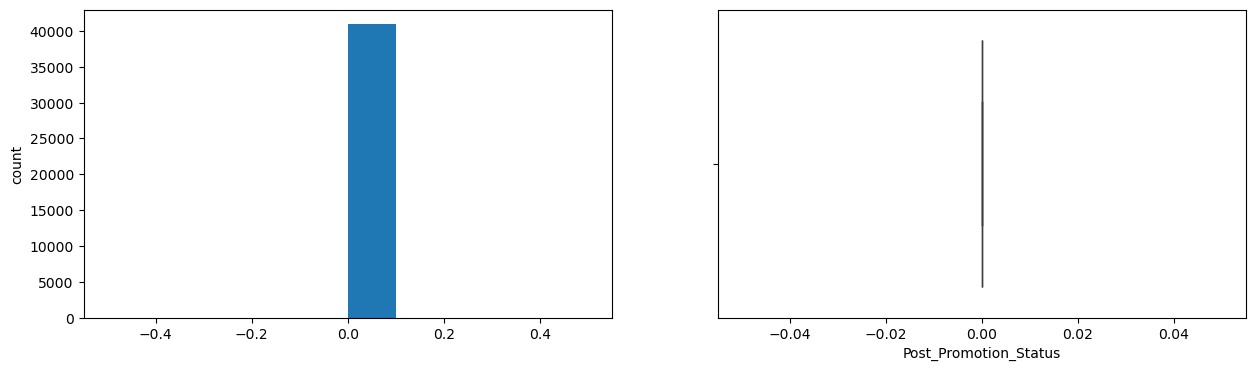

H_Local
Skew : -9.22


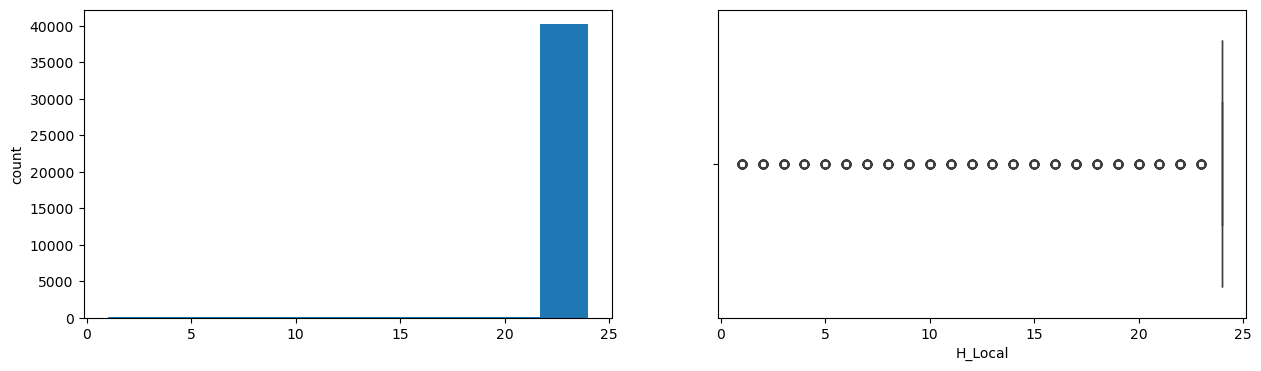

Published_Sunday
Skew : 2.31


Published_Monday
Skew : 2.04


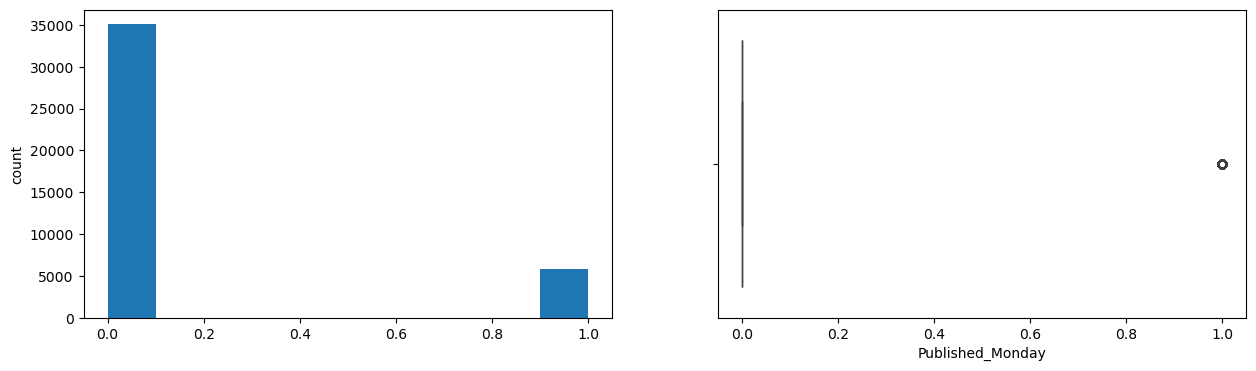

Published_Tuesday
Skew : 1.96


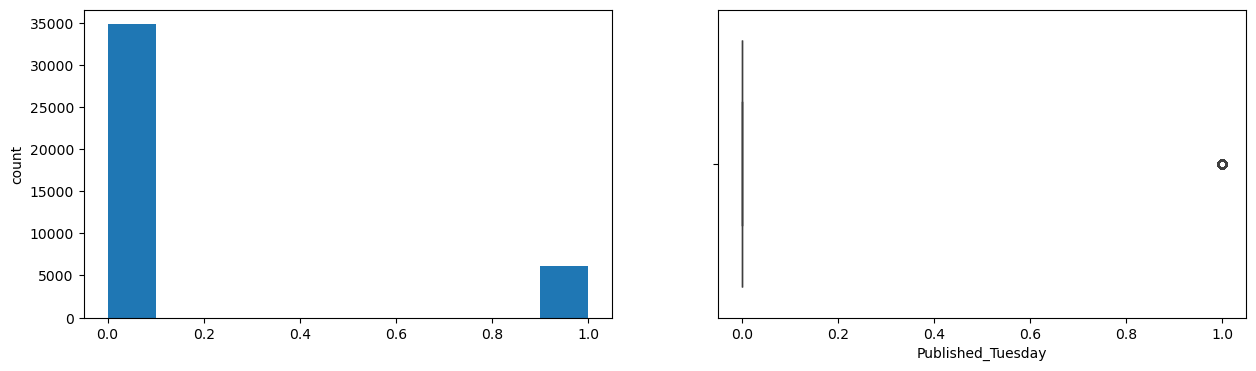

Published_Wednesday
Skew : 1.88


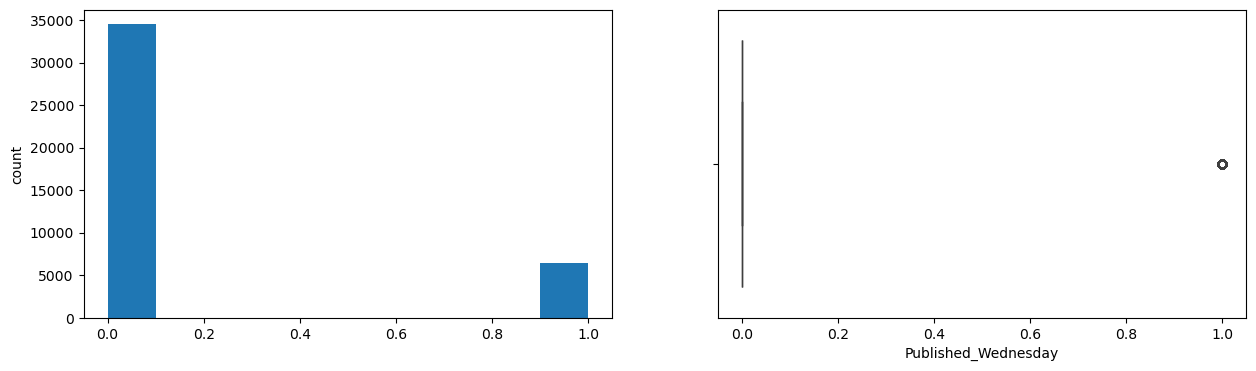

Published_Thursday
Skew : 2.03


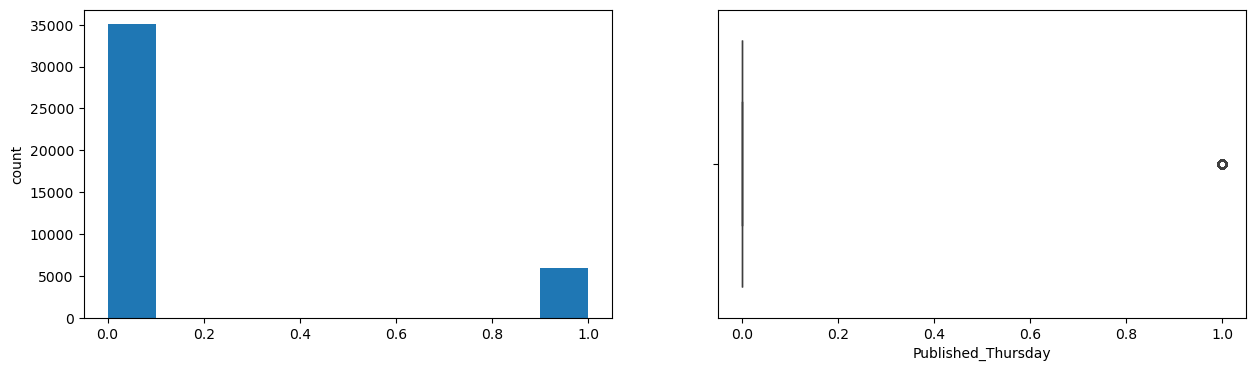

Published_Friday
Skew : 2.0


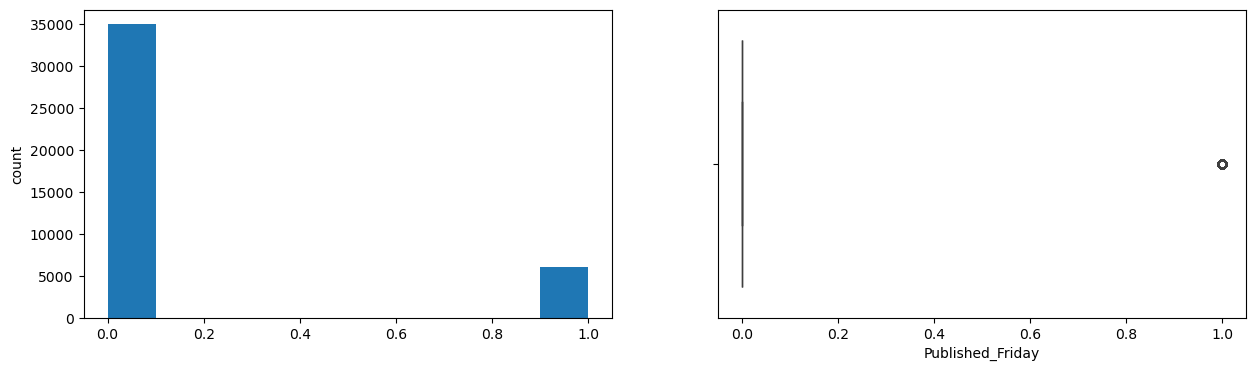

Published_Saturday
Skew : 2.11


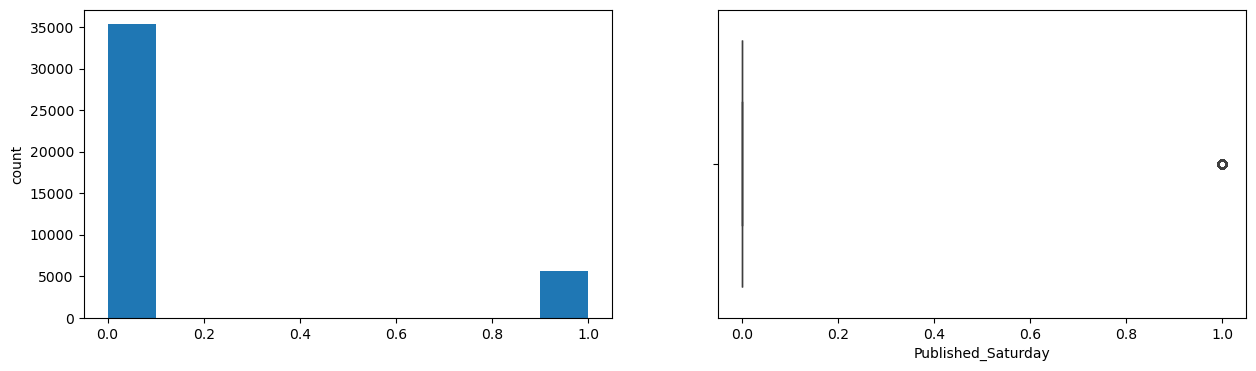

BaseDate_Sunday
Skew : 2.06


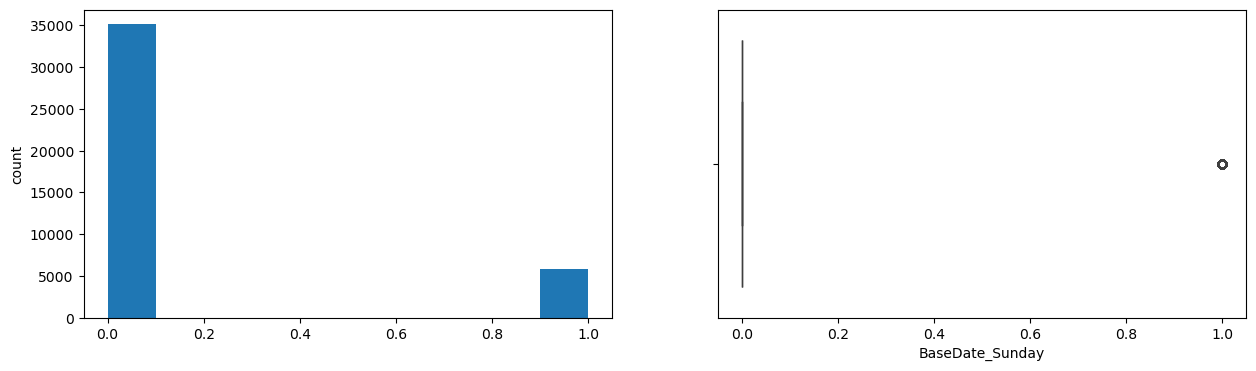

BaseDate_Monday
Skew : 2.17


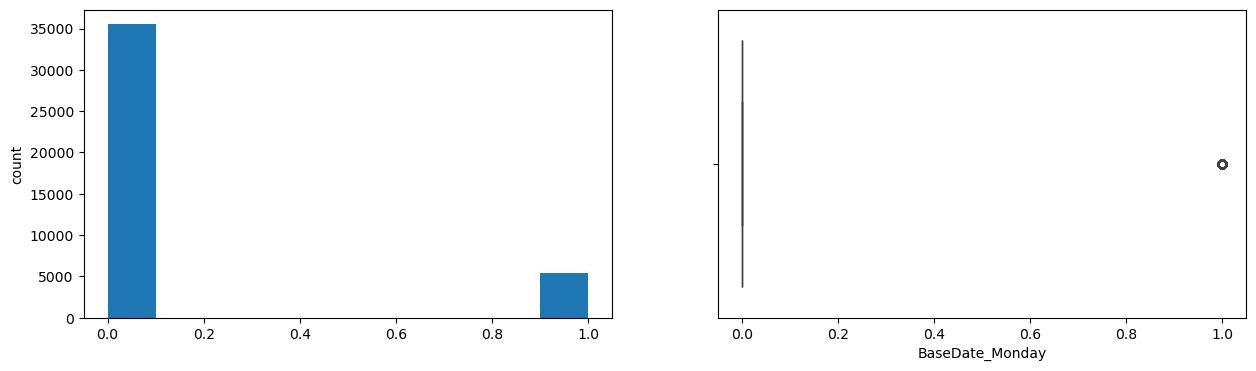

BaseDate_Tuesday
Skew : 2.1


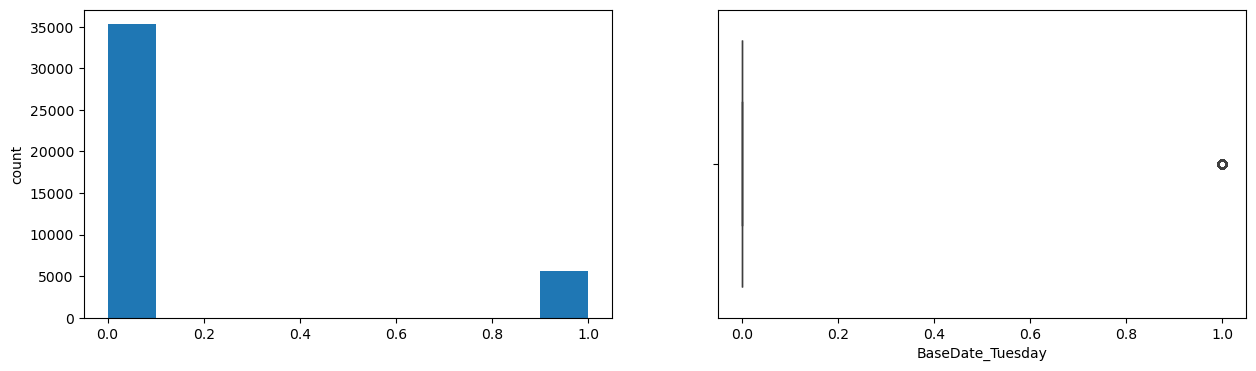

BaseDate_Wednesday
Skew : 1.98


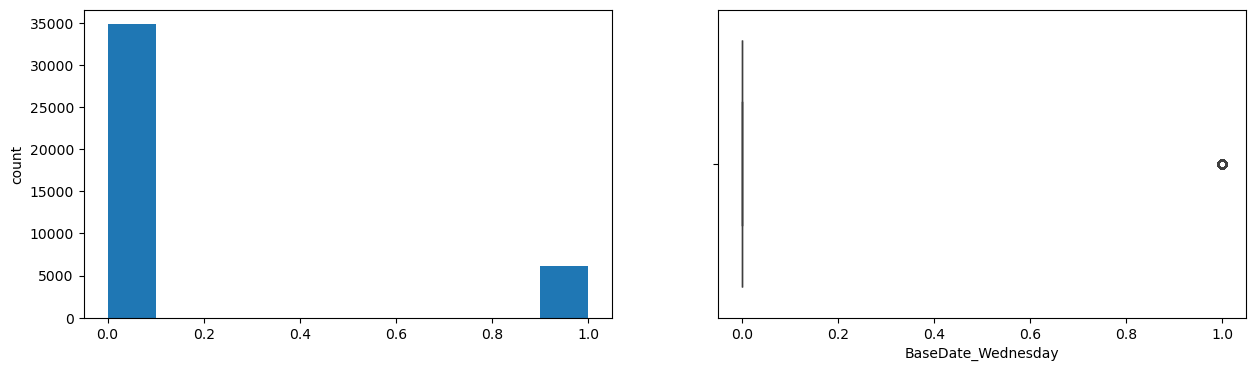

BaseDate_Thursday
Skew : 1.95


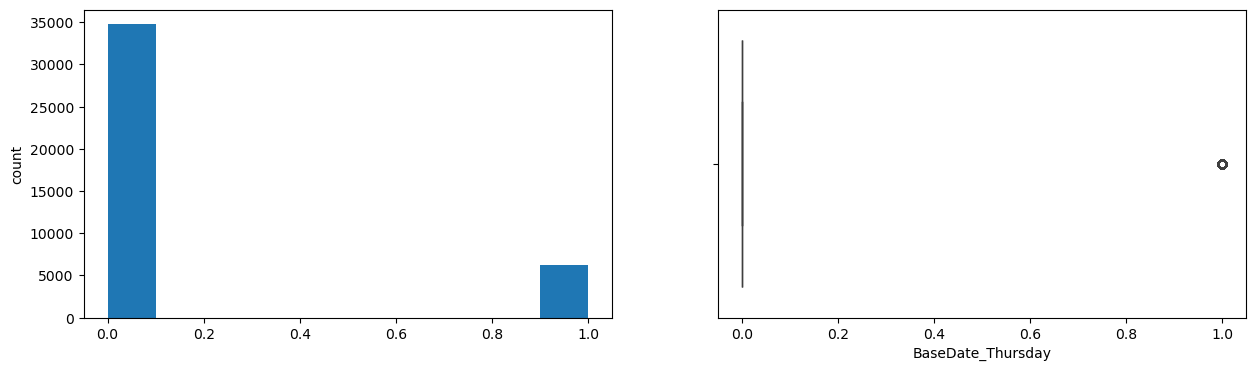

BaseDate_Friday
Skew : 2.03


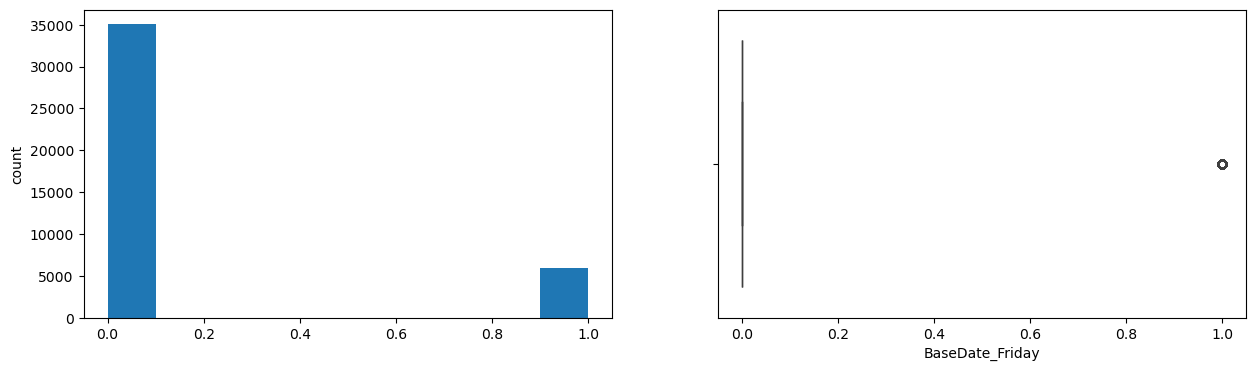

BaseDate_Saturday
Skew : 2.02


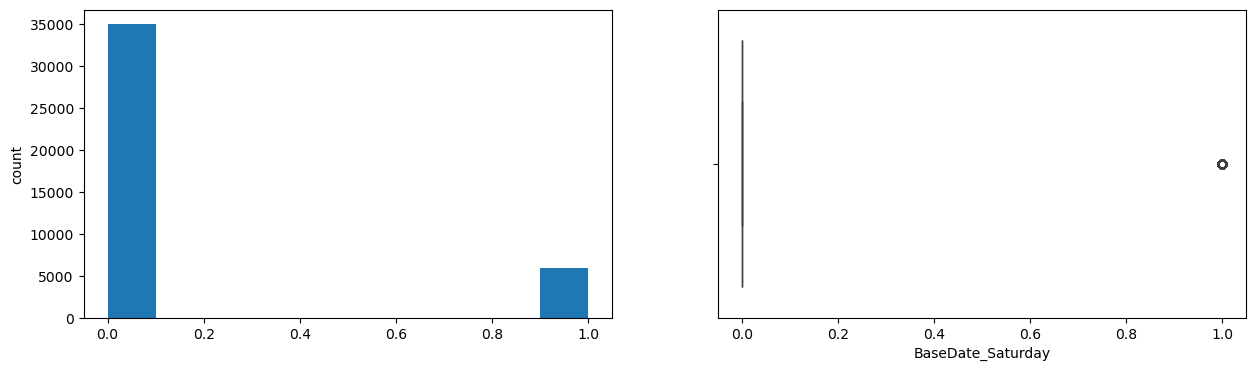

Target_Comment_Volume
Skew : 14.29


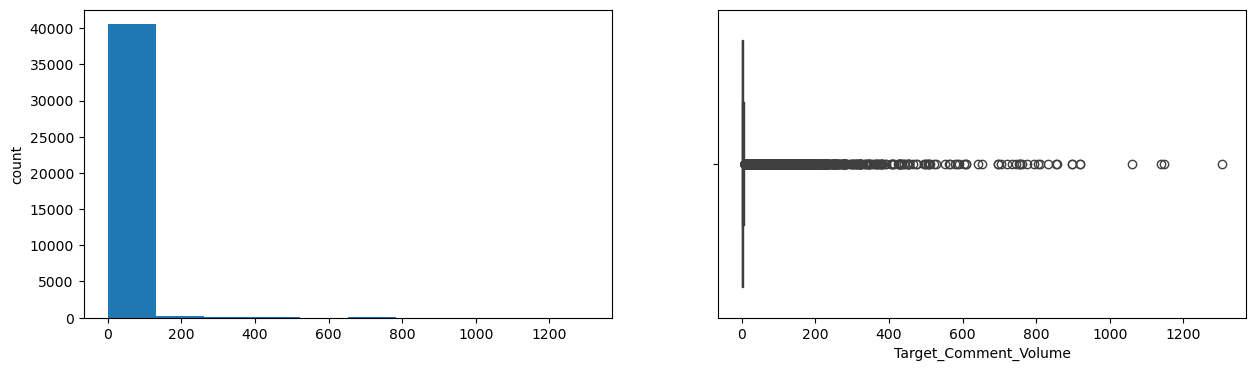

In [45]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

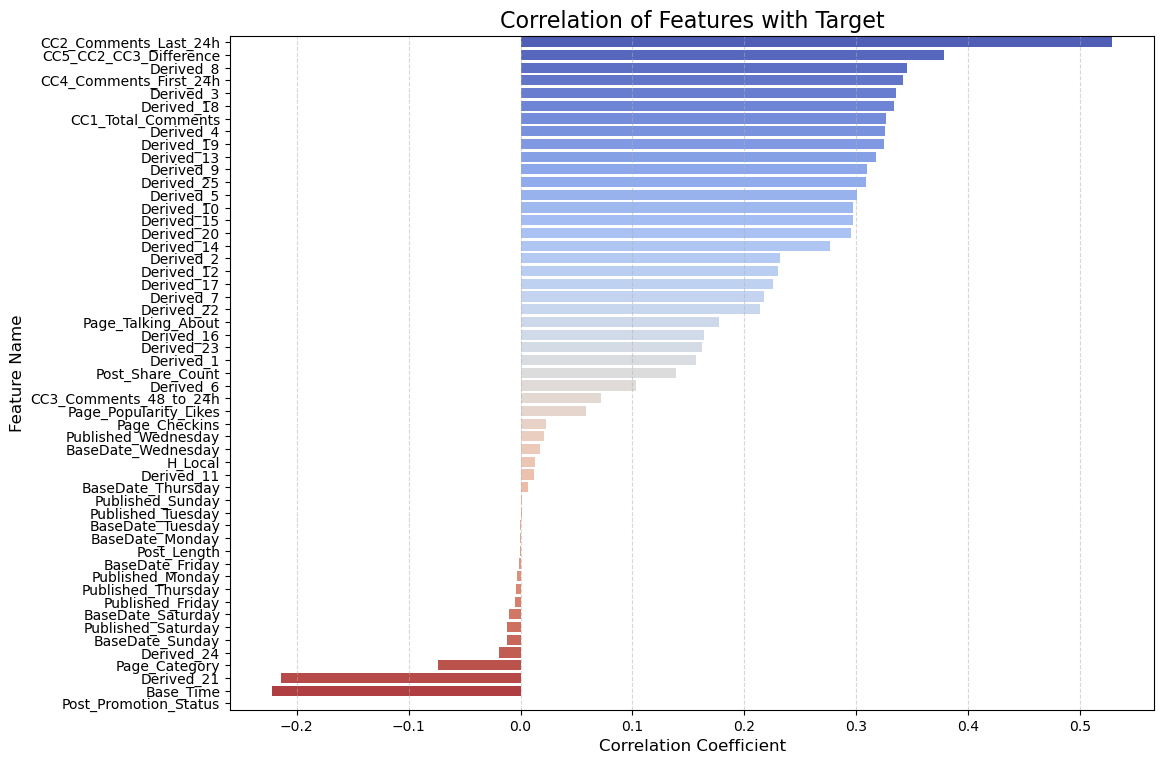

In [52]:
# Correlation calculation
numeric_df = data.select_dtypes(include=[np.number])
correlations = numeric_df.corr()["Target_Comment_Volume"].drop("Target_Comment_Volume").sort_values(ascending=False)

# Convert to DataFrame
corr_df = correlations.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=corr_df, x="Correlation", y="Feature", hue="Feature", dodge=False, palette="coolwarm")

plt.title("Correlation of Features with Target", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout(pad=2)
plt.show()

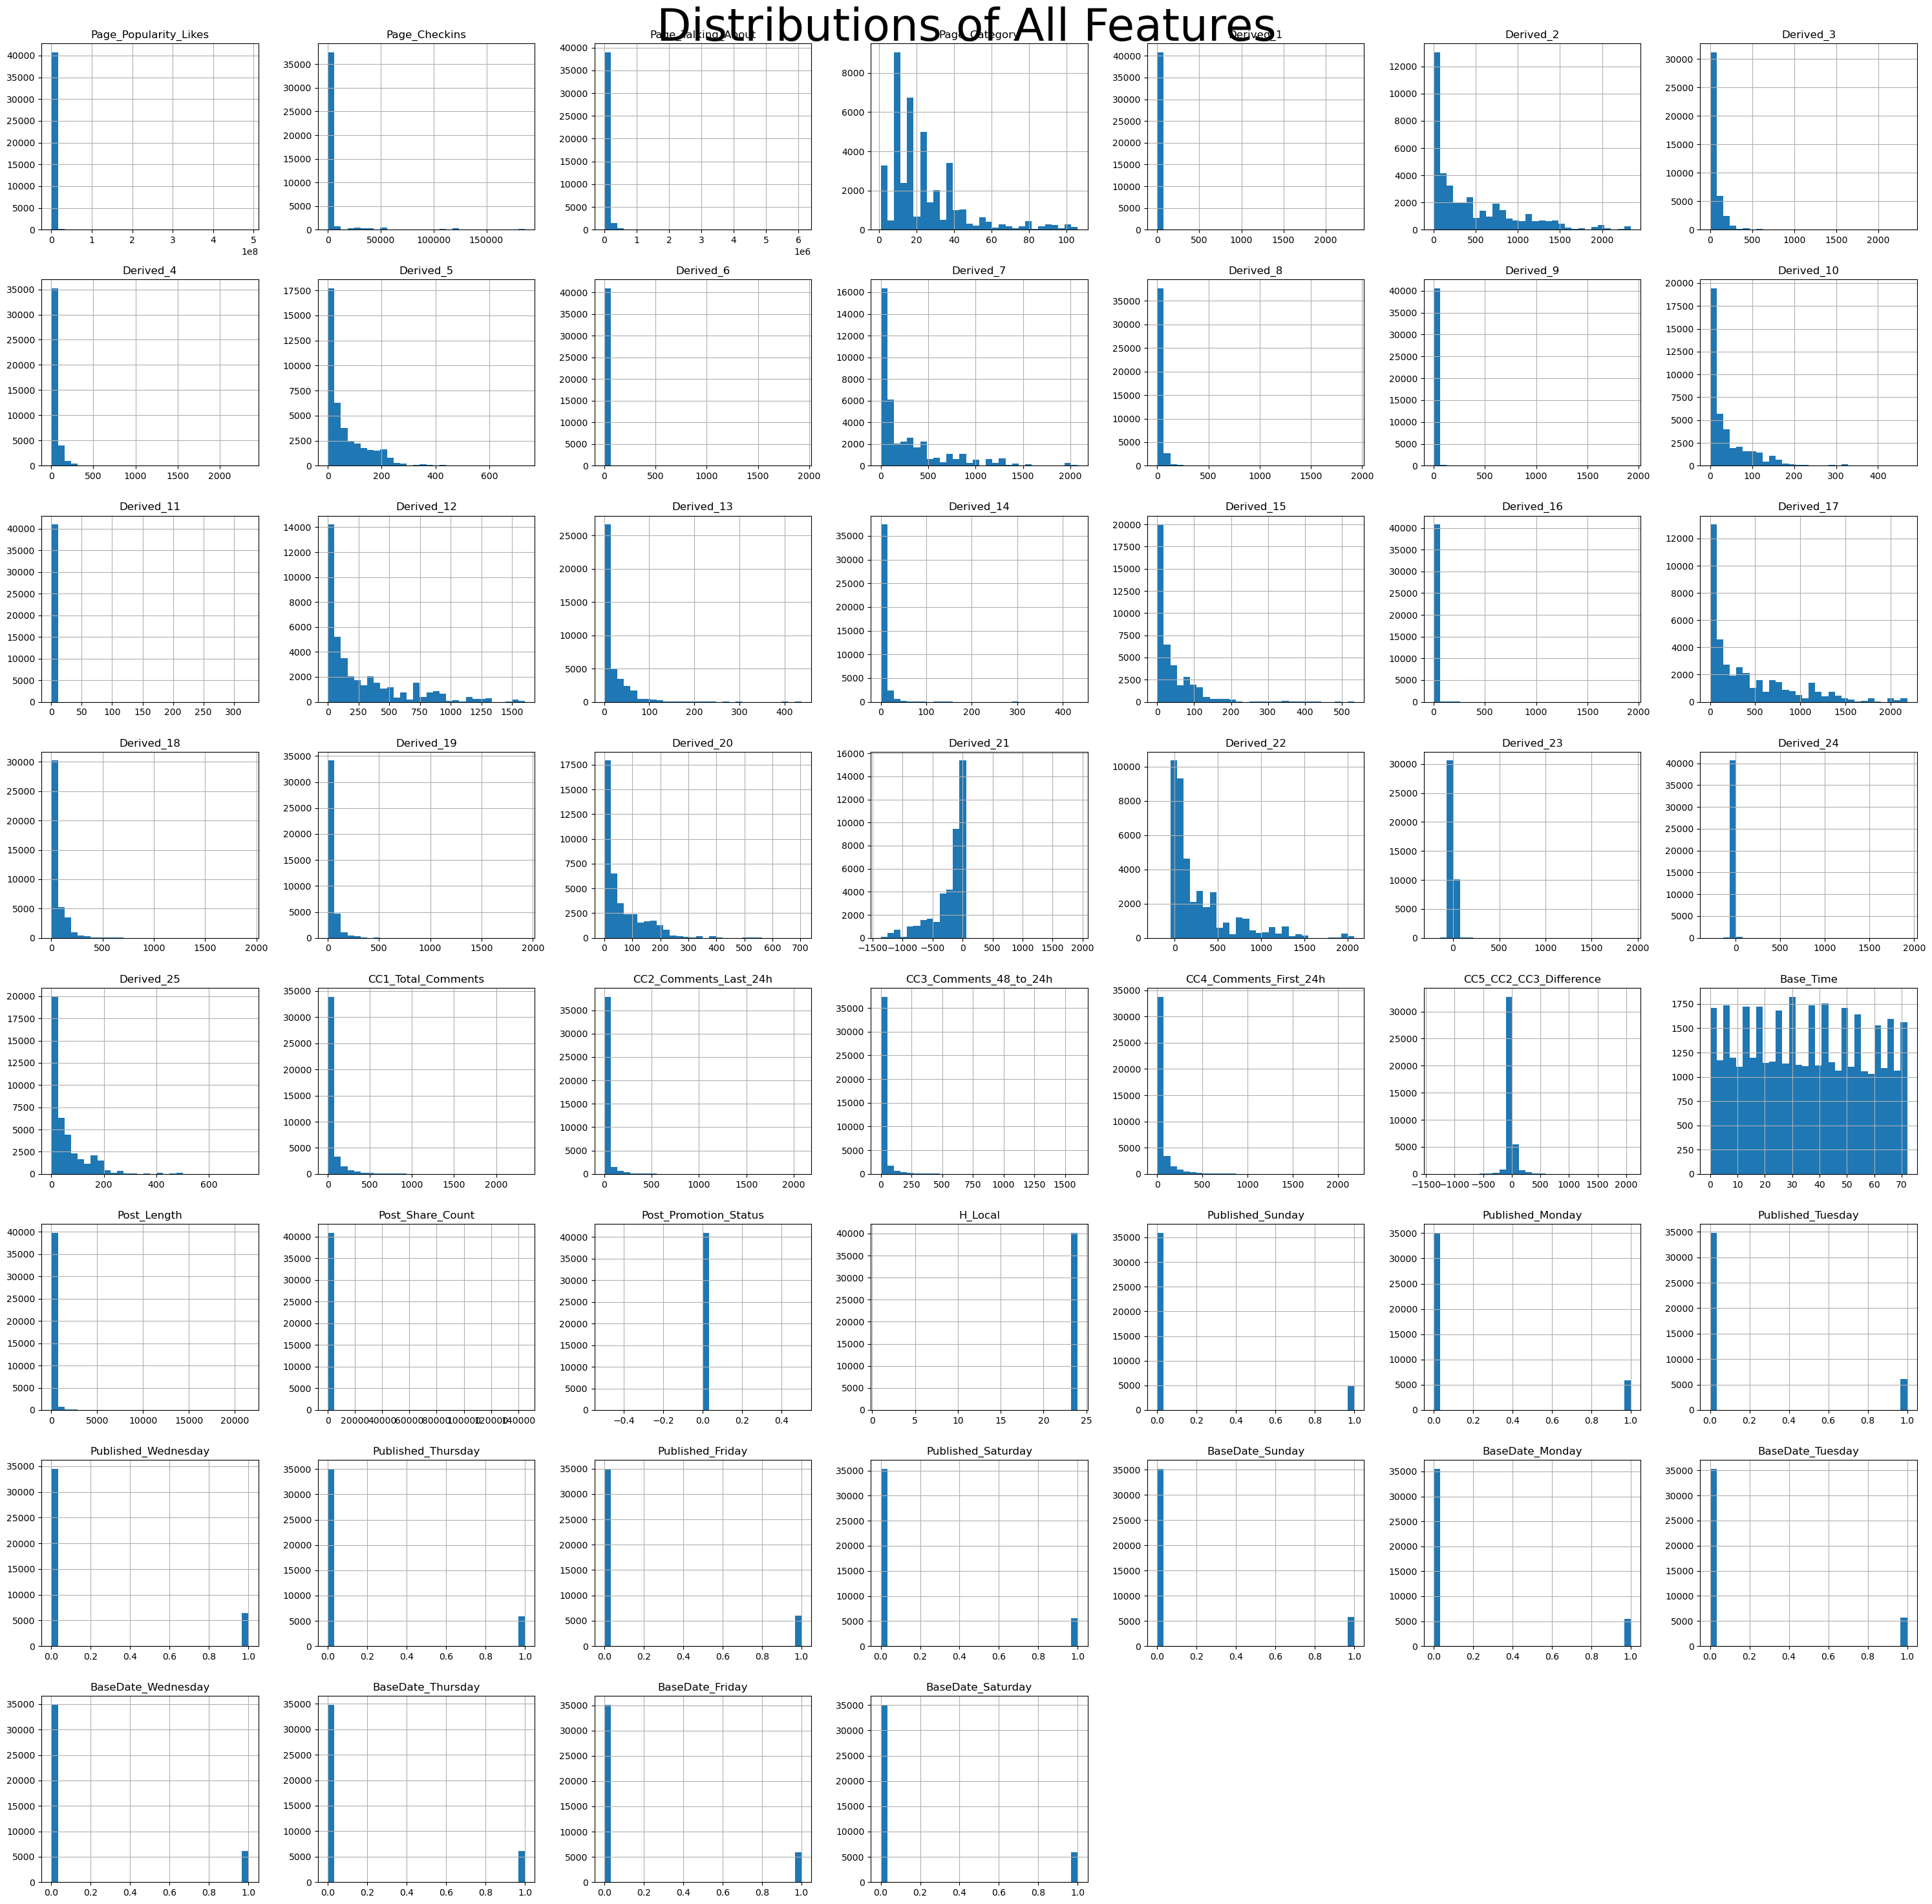

In [53]:
# Remove the target variable (Comment_Count) from the visualization as it will be analyzed separately
data.drop(columns=["Target_Comment_Volume"]).hist(
    bins=30,                # Divide data into 30 equal-width bins
    figsize=(30, 30)       # Create a large figure (30x30 inches) to accommodate all features
)

plt.suptitle("Distributions of All Features", fontsize=50)
plt.tight_layout()
plt.show()

<Axes: >

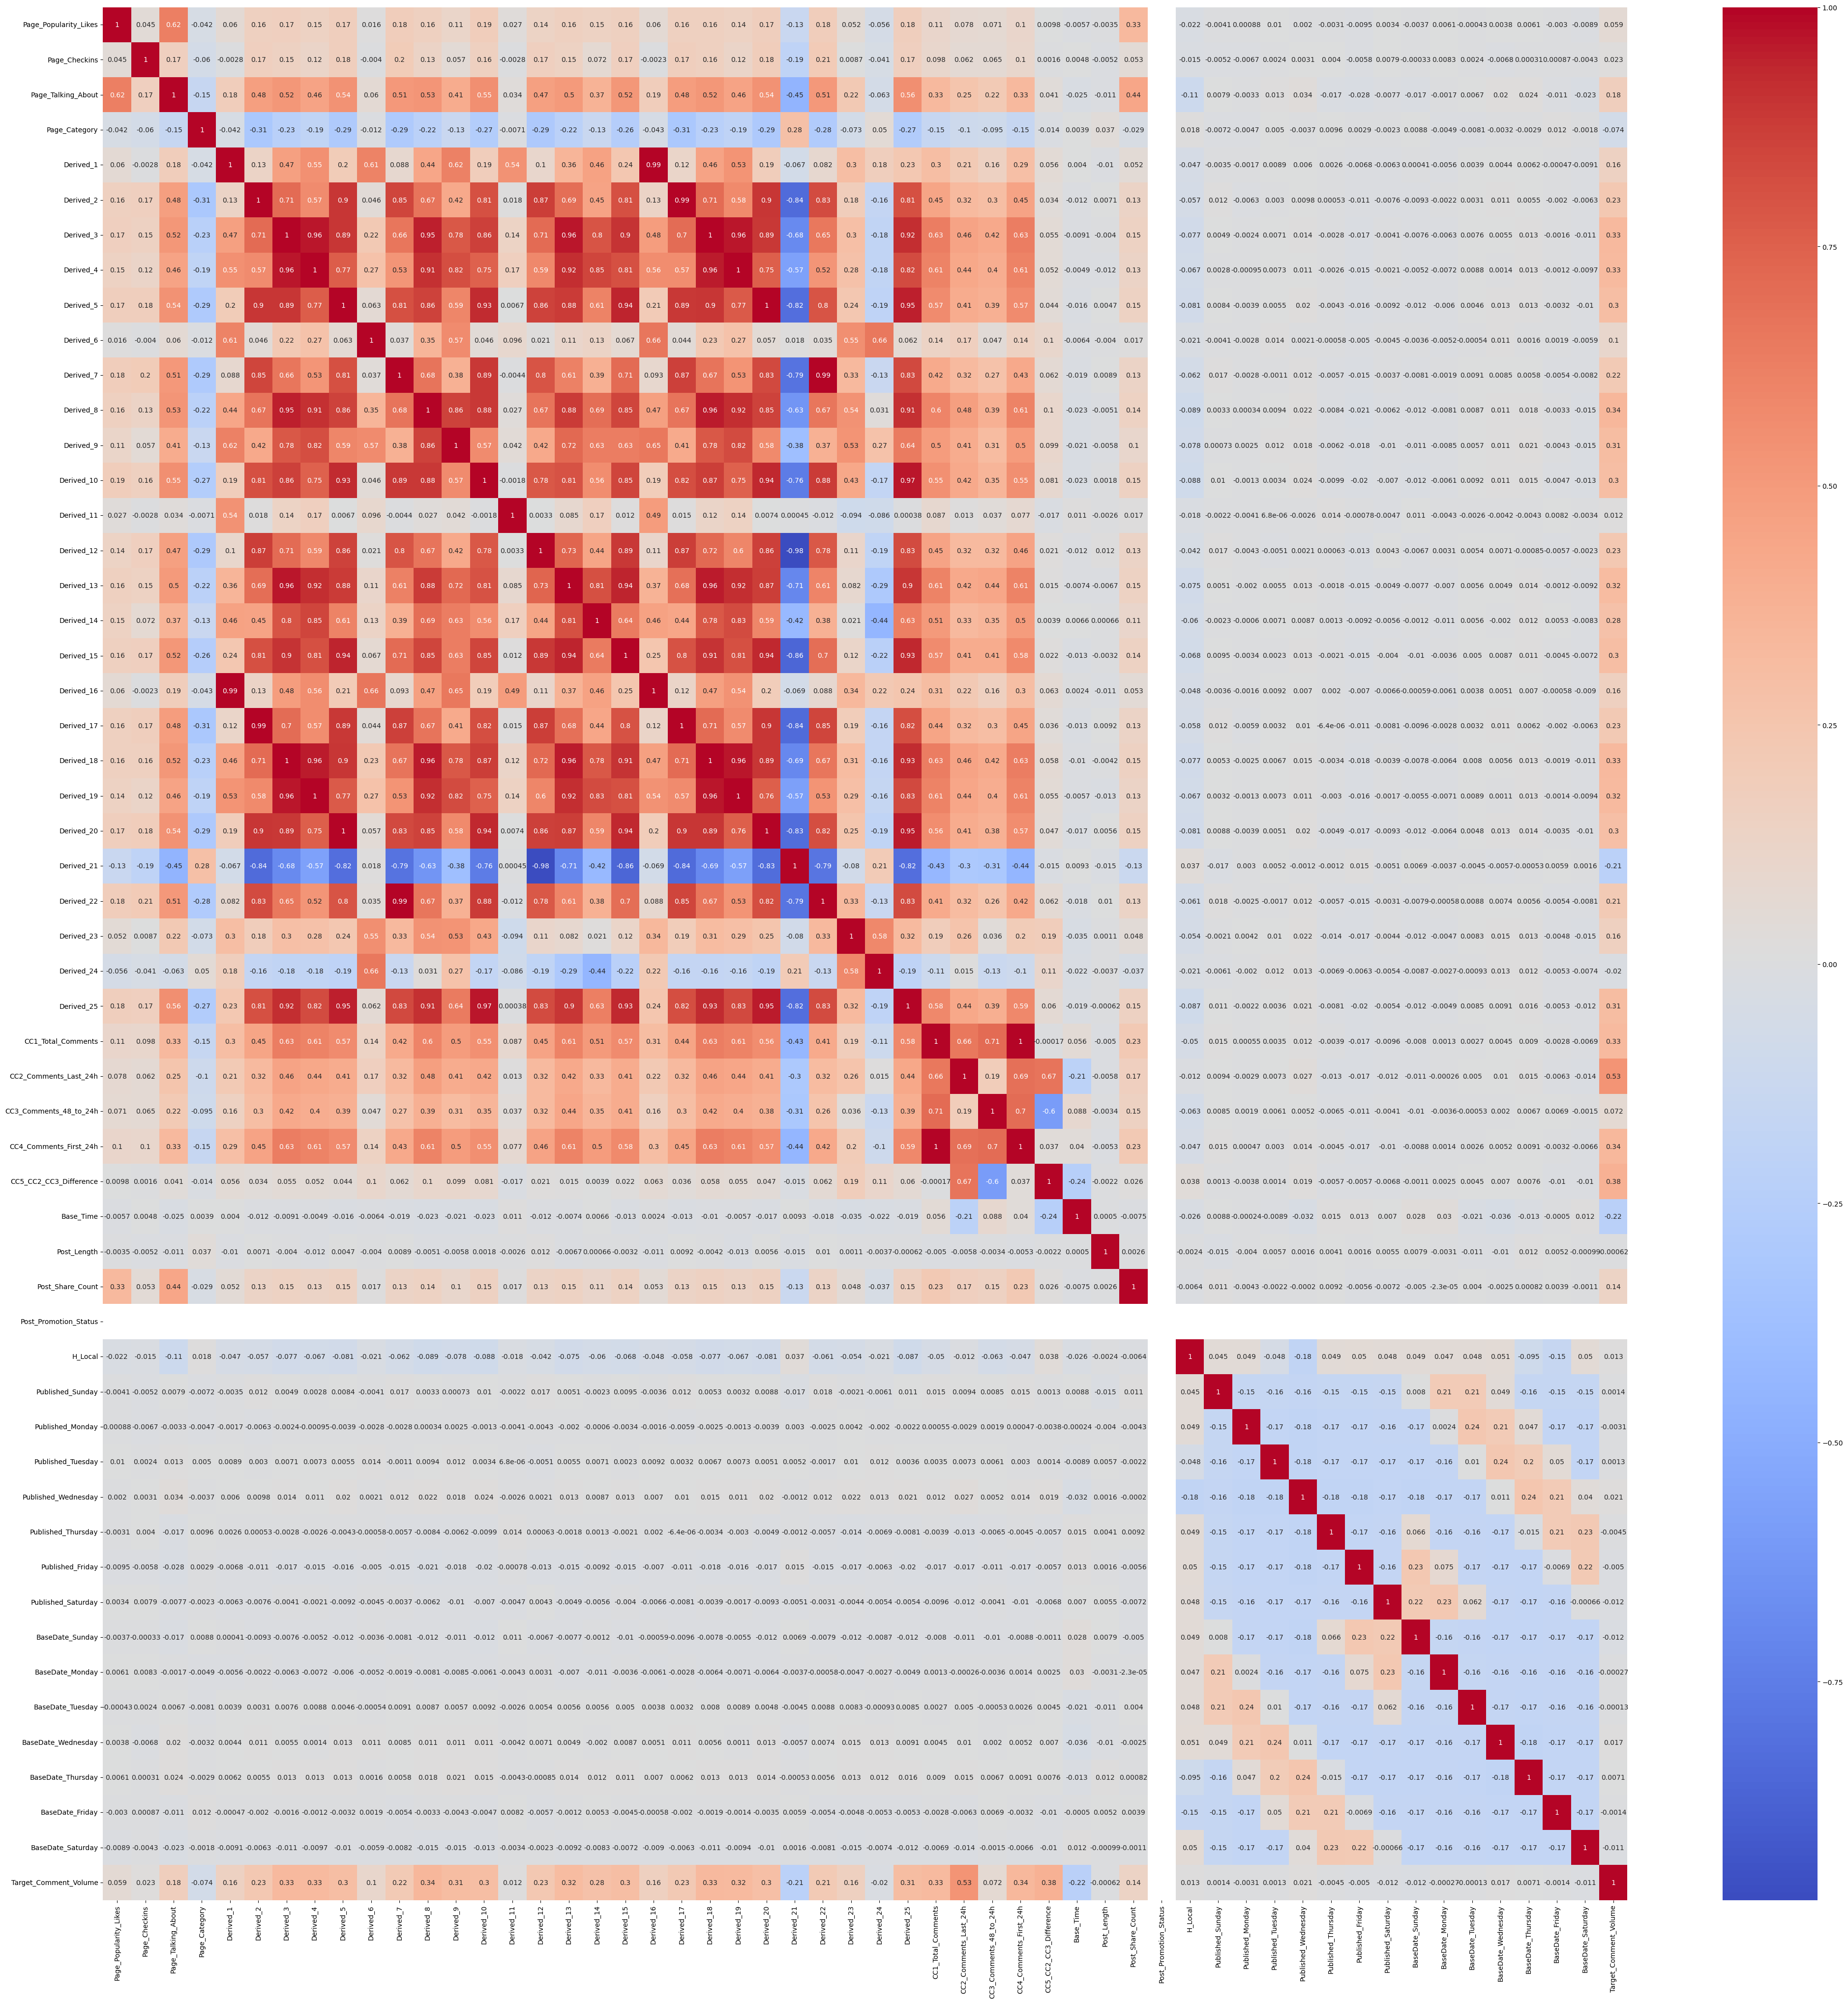

In [48]:
# lec 8 slide 45 - visualizing similarities between features with a correlation matrix
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)

Target_Binned
0           22578
1–10        13703
11–100       4079
101–1000      584
1000+           4
Name: count, dtype: int64


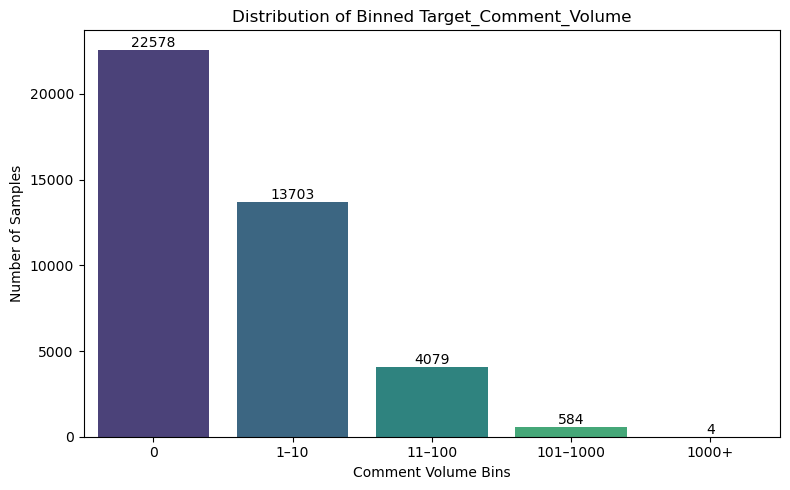

In [54]:
# visualize the Target_Comment_Volume
bins = [-1, 0, 10, 100, 1000, float('inf')]
labels = ['0', '1–10', '11–100', '101–1000', '1000+']

data['Target_Binned'] = pd.cut(data['Target_Comment_Volume'], bins=bins, labels=labels)

binned_counts = data['Target_Binned'].value_counts().sort_index()

print(binned_counts)

# Convert to DataFrame
binned_df = binned_counts.reset_index()
binned_df.columns = ['Bin', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=binned_df, x='Bin', y='Count', hue='Bin', palette='viridis')
plt.title('Distribution of Binned Target_Comment_Volume')
plt.xlabel('Comment Volume Bins')
plt.ylabel('Number of Samples')

# Optional: add counts on top of bars
for i, count in enumerate(binned_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()